In [ ]:
#This is a collection of scripts for selecting the best hyperparameters for each model
#The hyperparameter tuning was performed with a random search within a wide set of hyperparameters

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# File Path
input_json_path = r'D:\FOLDER FROM THESIS\THESIS\Processed data\Training ML\train_after_correlationandPCA.json'

# Load the JSON file into a DataFrame
data = pd.read_json(input_json_path, orient='records', lines=True)

# Display the first few rows of the DataFrame
print(data.head())

# Adjust display settings to show all columns
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(data.head())


   byg026Opførelsesår  byg027OmTilbygningsår  eta020SamletArealAfEtage  \
0                1984                   -999                      -999   
1                1965                   -999                      -999   
2                1985                   -999                      -999   
3                1999                   -999                      -999   
4                1998                   -999                      -999   

        b_div_c  landmovelandmove_idw25     dtm20    slope20  groundwate  \
0  2.819367e+06               -0.312608  5.657708   3.943355         243   
1  1.980857e+05               -1.236900  6.116316   4.724093         235   
2  7.041810e+05               -0.630084  5.889756   3.023967         237   
3  1.953252e+06               -0.086822  7.884224  10.816767         343   
4  1.436148e+06               -0.044148  5.827804   3.945037         256   

   sand_depth  clay_depth  ...  byg033Tagdækningsmateriale_12  \
0         0.0  475.399567  ...   

In [4]:
# List of additional categorical columns that need to be encoded
additional_categorical_columns = ['byg056Varmeinstallation', 'eta006BygningensEtagebetegnelse', 
                                  'landscape', 'TSYM', 'byg021BygningensAnvendelse_grouped']

# Perform one-hot encoding for the additional categorical columns
data_encoded = pd.get_dummies(data, columns=additional_categorical_columns)

# Display the first few rows of the encoded DataFrame
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(data_encoded.head())


   byg026Opførelsesår  byg027OmTilbygningsår  eta020SamletArealAfEtage  \
0                1984                   -999                      -999   
1                1965                   -999                      -999   
2                1985                   -999                      -999   
3                1999                   -999                      -999   
4                1998                   -999                      -999   

        b_div_c  landmovelandmove_idw25     dtm20    slope20  groundwate  \
0  2.819367e+06               -0.312608  5.657708   3.943355         243   
1  1.980857e+05               -1.236900  6.116316   4.724093         235   
2  7.041810e+05               -0.630084  5.889756   3.023967         237   
3  1.953252e+06               -0.086822  7.884224  10.816767         343   
4  1.436148e+06               -0.044148  5.827804   3.945037         256   

   sand_depth  clay_depth  Damage       coast  waterbodies  bluespot  \
0         0.0  475.399567 

In [5]:
# Split the data into features (X) and target (y)
X = data_encoded.drop(columns=['Damage'])
y = data_encoded['Damage']

# Splitting the data into training and testing sets
# Keeping 30% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# The variables X_train, X_test, y_train, y_test are now ready for use in model training and evaluation.


In [ ]:
#Random Forest

In [7]:
import itertools
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# hyperparameters to explore
n_estimators_options = np.linspace(100, 1000, 10, dtype=int)  # 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000
max_depth_options = np.linspace(10, 100, 10, dtype=int)       # 10, 20, 30, 40, 50, 60, 70, 80, 90, 100
min_samples_split_options = np.linspace(2, 20, 10, dtype=int) # 2, 4, 6, 8, 10, 12, 14, 16, 18, 20
min_samples_leaf_options = np.linspace(1, 10, 10, dtype=int)  # 1, 2, 3, 4, 5, 6, 7, 8, 9, 10

# Create a list of all possible combinations
all_combinations = list(itertools.product(n_estimators_options, max_depth_options, min_samples_split_options, min_samples_leaf_options))

# Randomly select a manageable number of unique combinations to test (e.g., 50)
selected_combinations = random.sample(all_combinations, 20)

# Dictionary to store classification reports
classification_reports = {}

# Iterate over the selected combinations
for i, (n_estimators, max_depth, min_samples_split, min_samples_leaf) in enumerate(selected_combinations, 1):
    print(f"--- Iteration {i} ---")
    print(f"Parameters: n_estimators={n_estimators}, max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}")

    # Initialize the model with the current set of parameters
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
    
    # Fit the model
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Generate and store the classification report
    report = classification_report(y_test, y_pred)
    classification_reports[f"Iteration {i}"] = report
    print(report)

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

# classification_reports dictionary holds the classification report for each iteration


--- Iteration 1 ---
Parameters: n_estimators=300, max_depth=100, min_samples_split=6, min_samples_leaf=3
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     43969
           1       0.78      0.59      0.68     10620

    accuracy                           0.89     54589
   macro avg       0.85      0.78      0.80     54589
weighted avg       0.88      0.89      0.88     54589

Confusion Matrix:
 [[42230  1739]
 [ 4318  6302]]
--- Iteration 2 ---
Parameters: n_estimators=500, max_depth=30, min_samples_split=16, min_samples_leaf=3
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     43969
           1       0.78      0.59      0.67     10620

    accuracy                           0.89     54589
   macro avg       0.85      0.77      0.80     54589
weighted avg       0.88      0.89      0.88     54589

Confusion Matrix:
 [[42250  1719]
 [ 4369  6251]]
--- Iteration 3 ---
Parameters: n_es

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     43969
           1       0.79      0.57      0.66     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.77      0.80     54589
weighted avg       0.88      0.89      0.88     54589

Confusion Matrix:
 [[42329  1640]
 [ 4574  6046]]
--- Iteration 19 ---
Parameters: n_estimators=400, max_depth=10, min_samples_split=6, min_samples_leaf=4
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     43969
           1       0.82      0.40      0.54     10620

    accuracy                           0.87     54589
   macro avg       0.85      0.69      0.73     54589
weighted avg       0.86      0.87      0.85     54589

Confusion Matrix:
 [[43038   931]
 [ 6336  4284]]
--- Iteration 20 ---
Parameters: n_estimators=600, max_depth=20, min_samples_split=12, min_samples_leaf=4
              precision    recall  

In [ ]:
# Random Forest best performances from first random search:
#"--- Iteration 7 ---
# Parameters: n_estimators=200, max_depth=50, min_samples_split=12, min_samples_leaf=4
#              precision    recall  f1-score   support
#
#           0       0.91      0.96      0.93     43969
#           1       0.79      0.59      0.67     10620
#
#    accuracy                           0.89     54589
#   macro avg       0.85      0.78      0.80     54589
# weighted avg       0.88      0.89      0.88     54589
#
# Confusion Matrix:
# [[42273  1696]
# [ 4357  6263]]
# --- Iteration 9 ---
# Parameters: n_estimators=200, max_depth=60, min_samples_split=4, min_samples_leaf=1
#              precision    recall  f1-score   support
#
#           0       0.91      0.96      0.93     43969
#           1       0.78      0.62      0.69     10620
#
#    accuracy                           0.89     54589
#   macro avg       0.85      0.79      0.81     54589
# weighted avg       0.89      0.89      0.89     54589
#
# Confusion Matrix:
# [[42125  1844]
# [ 4088  6532]]
# --- Iteration 17 ---
# Parameters: n_estimators=900, max_depth=80, min_samples_split=14, min_samples_leaf=3
#              precision    recall  f1-score   support
#
#           0       0.91      0.96      0.93     43969
#           1       0.79      0.59      0.67     10620
#
#    accuracy                           0.89     54589
#   macro avg       0.85      0.78      0.80     54589
# weighted avg       0.88      0.89      0.88     54589
#
# Confusion Matrix:
# [[42253  1716]
# [ 4336  6284]]

In [26]:
# Adjusted hyperparameters based on best results
n_estimators_options = np.linspace(150, 950, 5, dtype=int)  # Exploring around 200 and 900
max_depth_options = [40, 50, 60, 70, 80, 90]  # Exploring around 50, 60, and 80
min_samples_split_options = [2, 4, 6, 10, 12, 14, 16]  # Narrowed range around 4, 12, and 14
min_samples_leaf_options = [1, 2, 3, 4, 5]  # Narrowed range around 1, 3, and 4

# Create a list of all possible combinations
all_combinations = list(itertools.product(n_estimators_options, max_depth_options, min_samples_split_options, min_samples_leaf_options))

# Randomly select a manageable number of unique combinations to test
selected_combinations = random.sample(all_combinations, 20)

# Dictionary to store classification reports
classification_reports = {}

# Iterate over the selected combinations
for i, (n_estimators, max_depth, min_samples_split, min_samples_leaf) in enumerate(selected_combinations, 1):
    print(f"--- Iteration {i} ---")
    print(f"Parameters: n_estimators={n_estimators}, max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}")

    # Initialize the model with the current set of parameters
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
    
    # Fit the model
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Generate and store the classification report
    report = classification_report(y_test, y_pred)
    classification_reports[f"Iteration {i}"] = report
    print(report)

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

# classification_reports dictionary holds the classification report for each iteration


--- Iteration 1 ---
Parameters: n_estimators=350, max_depth=80, min_samples_split=6, min_samples_leaf=3
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     43969
           1       0.78      0.59      0.67     10620

    accuracy                           0.89     54589
   macro avg       0.85      0.78      0.80     54589
weighted avg       0.88      0.89      0.88     54589

Confusion Matrix:
 [[42224  1745]
 [ 4322  6298]]
--- Iteration 2 ---
Parameters: n_estimators=950, max_depth=40, min_samples_split=10, min_samples_leaf=4
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     43969
           1       0.79      0.59      0.67     10620

    accuracy                           0.89     54589
   macro avg       0.85      0.78      0.80     54589
weighted avg       0.88      0.89      0.88     54589

Confusion Matrix:
 [[42258  1711]
 [ 4363  6257]]
--- Iteration 3 ---
Parameters: n_est

KeyboardInterrupt: 

In [ ]:
#ANN

In [16]:
import itertools
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Define hyperparameters to explore
layer_configs = [
    (64,), (128,),  # Single-layer networks with different widths
    (128, 64), (256, 128),  # Two-layer networks with different widths
    (64, 64, 64), (128, 128, 128),  # Three-layer networks with consistent width
    (128, 64, 32), (256, 128, 64, 32),  # Multi-layer networks decreasing in width
    (50, 100, 50), (100, 200, 100),  # Asymmetric configurations
]
batch_sizes = [16, 32, 64, 128, 256]  # Including smaller and larger batch sizes
epochs_options = [5, 10, 20, 30]  # Extending to more epochs
dropout_rates = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]  # A wider range of dropout rates

# Create combinations
all_combinations = list(itertools.product(layer_configs, batch_sizes, epochs_options, dropout_rates))

# Select a number of combinations randomly
selected_combinations = random.sample(all_combinations, 20)  # Adjust as needed

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# Iterate over the selected combinations
for i, (layers, batch_size, epochs, dropout_rate) in enumerate(selected_combinations, 1):
    print(f"--- Iteration {i} ---")
    print(f"Layers: {layers}, Batch Size: {batch_size}, Epochs: {epochs}, Dropout Rate: {dropout_rate}")

    # Create the model
    model = Sequential()
    for layer_size in layers:
        model.add(Dense(layer_size, activation='relu'))
        model.add(Dropout(dropout_rate))  # Add dropout layers
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)

    # Predict on test set and generate classification report
    y_pred = model.predict(X_test_scaled)
    y_pred = (y_pred > 0.5).astype(int)
    report = classification_report(y_test, y_pred)
    results[f"Iteration {i}"] = report
    print(report)

# results now contains the classification report for each iteration


--- Iteration 1 ---
Layers: (64, 64, 64), Batch Size: 16, Epochs: 5, Dropout Rate: 0.4
Test Loss: 0.28004780411720276
Test Accuracy: 0.8745351433753967
1706/1706 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     43969
           1       0.79      0.48      0.60     10620

    accuracy                           0.87     54589
   macro avg       0.84      0.73      0.76     54589
weighted avg       0.87      0.87      0.86     54589

--- Iteration 2 ---
Layers: (64,), Batch Size: 64, Epochs: 10, Dropout Rate: 0.3
Test Loss: 0.27090224623680115
Test Accuracy: 0.8793346881866455
1706/1706 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     43969
           1       0.76      0.55      0.64     10620

    accuracy                           0.88     54589
   macro avg       0.83      0.76      0.78

1706/1706 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     43969
           1       0.74      0.57      0.65     10620

    accuracy                           0.88     54589
   macro avg       0.82      0.76      0.79     54589
weighted avg       0.87      0.88      0.87     54589

--- Iteration 17 ---
Layers: (128, 64, 32), Batch Size: 32, Epochs: 5, Dropout Rate: 0.5
Test Loss: 0.27995556592941284
Test Accuracy: 0.8741688132286072
1706/1706 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.88      0.97      0.93     43969
           1       0.79      0.48      0.60     10620

    accuracy                           0.87     54589
   macro avg       0.84      0.72      0.76     54589
weighted avg       0.87      0.87      0.86     54589

--- Iteration 18 ---
Layers: (64, 64, 64), Batch Size: 64, Epochs: 30, Dropout

--- Iteration 1 ---
Layers: (128,), Batch Size: 128, Epochs: 20, Dropout Rate: 0.1
Test Loss: 0.27432894706726074
Test Accuracy: 0.8801223635673523
1706/1706 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     43969
           1       0.72      0.62      0.67     10620

    accuracy                           0.88     54589
   macro avg       0.82      0.78      0.80     54589
weighted avg       0.87      0.88      0.88     54589

Precision-Recall AUC: 0.746492247274883


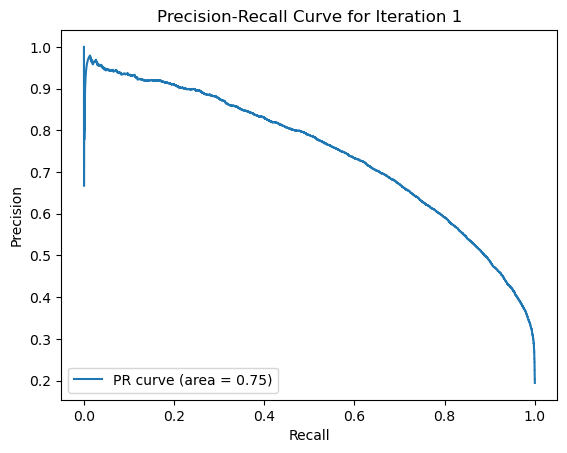

--- Iteration 2 ---
Layers: (64,), Batch Size: 16, Epochs: 30, Dropout Rate: 0.2
Test Loss: 0.27195775508880615
Test Accuracy: 0.8806719183921814
1706/1706 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     43969
           1       0.75      0.58      0.66     10620

    accuracy                           0.88     54589
   macro avg       0.83      0.77      0.79     54589
weighted avg       0.87      0.88      0.87     54589

Precision-Recall AUC: 0.750535469017946


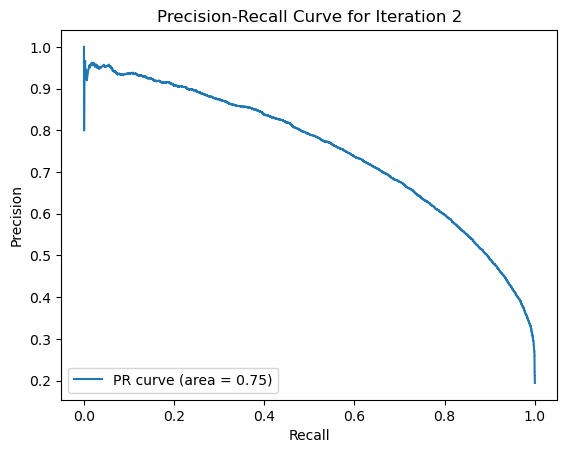

--- Iteration 3 ---
Layers: (256, 128, 64, 32), Batch Size: 32, Epochs: 30, Dropout Rate: 0.0


KeyboardInterrupt: 

In [29]:
# Define hyperparameters to explore
layer_configs = [
    (64,), (128,),  # Single-layer networks with different widths
    (128, 64), (256, 128),  # Two-layer networks with different widths
    (64, 64, 64), (128, 128, 128),  # Three-layer networks with consistent width
    (128, 64, 32), (256, 128, 64, 32),  # Multi-layer networks decreasing in width
    (50, 100, 50), (100, 200, 100),  # Asymmetric configurations
]
batch_sizes = [16, 32, 64, 128, 256]  # Including smaller and larger batch sizes
epochs_options = [5, 10, 20, 30]  # Extending to more epochs
dropout_rates = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]  # A wider range of dropout rates

# Create combinations
all_combinations = list(itertools.product(layer_configs, batch_sizes, epochs_options, dropout_rates))

# Select a number of combinations randomly
selected_combinations = random.sample(all_combinations, 20)  # Adjust as needed

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# Iterate over the selected combinations
for i, (layers, batch_size, epochs, dropout_rate) in enumerate(selected_combinations, 1):
    print(f"--- Iteration {i} ---")
    print(f"Layers: {layers}, Batch Size: {batch_size}, Epochs: {epochs}, Dropout Rate: {dropout_rate}")

    # Create the model
    model = Sequential()
    for layer_size in layers:
        model.add(Dense(layer_size, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)

    # Predict probabilities for the test set
    y_probs = model.predict(X_test_scaled).ravel()

    # Calculate precision and recall
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    pr_auc = auc(recall, precision)

    # Generate and store the classification report and PR AUC score
    y_pred = (y_probs > 0.5).astype(int)
    report = classification_report(y_test, y_pred)
    results[f"Iteration {i}"] = {"Report": report, "PR AUC": pr_auc}
    print(report)
    print(f"Precision-Recall AUC: {pr_auc}")

    # Plot the Precision-Recall curve
    plt.figure()
    plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for Iteration {i}')
    plt.legend(loc="lower left")
    plt.show()

In [ ]:
#Gradient Boosting

In [17]:
import itertools
import random
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Hyperparameters for Gradient Boosting
n_estimators_options = np.linspace(50, 1000, 20, dtype=int)  # More options for the number of boosting stages
learning_rate_options = np.linspace(0.01, 0.2, 10)           # More options for learning rates
max_depth_options = np.linspace(3, 10, 8, dtype=int)         # More options for maximum depths
min_samples_split_options = np.linspace(2, 10, 5, dtype=int) # More options for minimum samples split
min_samples_leaf_options = np.linspace(1, 5, 5, dtype=int)   # More options for minimum samples leaf
max_features_options = ['sqrt', 'log2', None]               # Adding max_features hyperparameter
subsample_options = np.linspace(0.6, 1.0, 5)                # Adding subsample hyperparameter

# Create combinations
all_combinations = list(itertools.product(n_estimators_options, learning_rate_options, max_depth_options, min_samples_split_options, min_samples_leaf_options))

# Select a number of combinations randomly
selected_combinations = random.sample(all_combinations, 20)  # Adjust as needed

# Dictionary to store results
results = {}

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Iterate over the selected combinations
for i, (n_estimators, learning_rate, max_depth, min_samples_split, min_samples_leaf) in enumerate(selected_combinations, 1):
    print(f"--- Iteration {i} ---")
    print(f"Parameters: n_estimators={n_estimators}, learning_rate={learning_rate}, max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}")

    # Initialize and configure the Gradient Boosting model
    gb_model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
    
    # Train the model
    gb_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_gb = gb_model.predict(X_test_scaled)

    # Generate and store the classification report
    report = classification_report(y_test, y_pred_gb)
    results[f"Iteration {i}"] = report
    print(report)

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred_gb)
    print("Confusion Matrix:\n", cm)

# Now 'results' contains the classification report for each iteration


--- Iteration 1 ---
Parameters: n_estimators=350, learning_rate=0.09444444444444444, max_depth=6, min_samples_split=10, min_samples_leaf=4
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.76      0.64      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.79      0.81     54589
weighted avg       0.88      0.89      0.89     54589

Confusion Matrix:
 [[41811  2158]
 [ 3869  6751]]
--- Iteration 2 ---
Parameters: n_estimators=700, learning_rate=0.11555555555555555, max_depth=6, min_samples_split=4, min_samples_leaf=5
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.75      0.64      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.80      0.81     54589
weighted avg       0.89      0.89      0.89     54589

Confusion Matrix:
 

In [ ]:
# --- Iteration 5 ---
# Parameters: n_estimators=900, learning_rate=0.07333333333333333, max_depth=8, min_samples_split=10, min_samples_leaf=5
#              precision    recall  f1-score   support
#
#           0       0.92      0.95      0.93     43969
#           1       0.76      0.65      0.70     10620
#
#    accuracy                           0.89     54589
#   macro avg       0.84      0.80      0.82     54589
# weighted avg       0.89      0.89      0.89     54589
#
# Confusion Matrix:
# [[41757  2212]
# [ 3734  6886]]

--- Iteration 1 ---
Parameters: n_estimators=950, learning_rate=0.08, max_depth=9, min_samples_split=9, min_samples_leaf=6, max_features=sqrt, subsample=0.9
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.76      0.65      0.70     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.80      0.82     54589
weighted avg       0.89      0.89      0.89     54589

Precision-Recall AUC: 0.7832072221378819


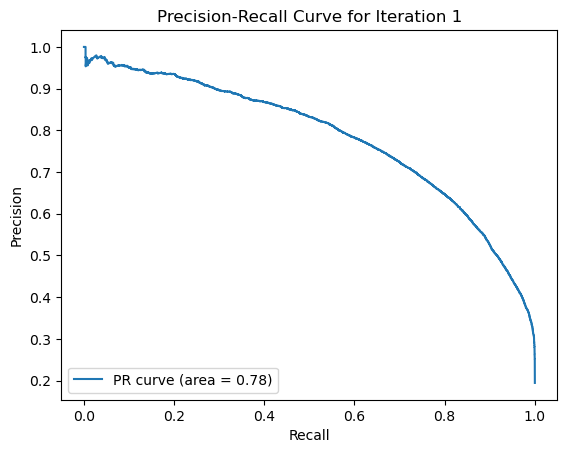

Confusion Matrix:
 [[41744  2225]
 [ 3726  6894]]
--- Iteration 2 ---
Parameters: n_estimators=800, learning_rate=0.060000000000000005, max_depth=10, min_samples_split=10, min_samples_leaf=5, max_features=None, subsample=0.6


KeyboardInterrupt: 

In [30]:
import itertools
import numpy as np
import random
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Adjusted hyperparameters based on best results
n_estimators_options = np.linspace(800, 1000, 5, dtype=int)  # Focusing around 900
learning_rate_options = np.linspace(0.05, 0.1, 6)           # Narrowing around 0.073
max_depth_options = np.linspace(6, 10, 5, dtype=int)        # Focusing around depth 8
min_samples_split_options = np.linspace(8, 12, 5, dtype=int) # Narrowing around 10
min_samples_leaf_options = np.linspace(4, 6, 3, dtype=int)   # Focusing around 5
max_features_options = ['sqrt', 'log2', None]               # Keeping as is
subsample_options = np.linspace(0.6, 1.0, 5)                # Keeping as is

# Create combinations
all_combinations = list(itertools.product(n_estimators_options, learning_rate_options, max_depth_options, min_samples_split_options, min_samples_leaf_options, max_features_options, subsample_options))

# Select a number of combinations randomly
selected_combinations = random.sample(all_combinations, 20)

# Dictionary to store results
results = {}

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Iterate over the selected combinations
for i, combo in enumerate(selected_combinations, 1):
    n_estimators, learning_rate, max_depth, min_samples_split, min_samples_leaf, max_features, subsample = combo
    print(f"--- Iteration {i} ---")
    print(f"Parameters: n_estimators={n_estimators}, learning_rate={learning_rate}, max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}, max_features={max_features}, subsample={subsample}")

    # Initialize and configure the Gradient Boosting model
    gb_model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, subsample=subsample, random_state=42)
    
    # Train the model
    gb_model.fit(X_train_scaled, y_train)

    # Predict probabilities for the test set
    y_probs = gb_model.predict_proba(X_test_scaled)[:, 1]

    # Calculate precision and recall
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    pr_auc = auc(recall, precision)

    # Generate and store the classification report and PR AUC score
    y_pred_gb = gb_model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred_gb)
    results[f"Iteration {i}"] = {"Report": report, "PR AUC": pr_auc}
    print(report)
    print(f"Precision-Recall AUC: {pr_auc}")

    # Plot the Precision-Recall curve
    plt.figure()
    plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for Iteration {i}')
    plt.legend(loc="lower left")
    plt.show()

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred_gb)
    print("Confusion Matrix:\n", cm)

--- Iteration 1 ---
Parameters: n_estimators=800, learning_rate=0.08, max_depth=10, min_samples_split=9, min_samples_leaf=4, max_features=sqrt, subsample=0.7
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.75      0.65      0.70     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.80      0.82     54589
weighted avg       0.89      0.89      0.89     54589

Precision-Recall AUC: 0.7802721456620219
ROC AUC: 0.9331330574070356


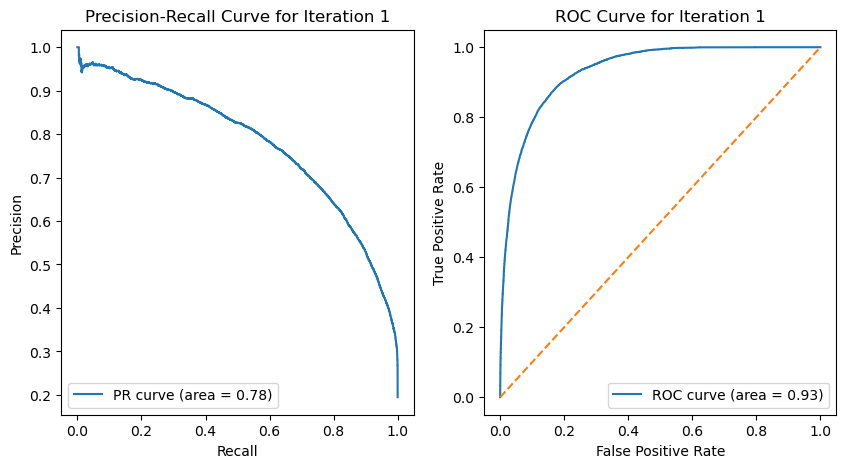

Confusion Matrix:
 [[41715  2254]
 [ 3711  6909]]
--- Iteration 2 ---
Parameters: n_estimators=950, learning_rate=0.08, max_depth=6, min_samples_split=12, min_samples_leaf=6, max_features=sqrt, subsample=0.9
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.76      0.64      0.70     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.80      0.81     54589
weighted avg       0.89      0.89      0.89     54589

Precision-Recall AUC: 0.7829426646676918
ROC AUC: 0.9336733948704401


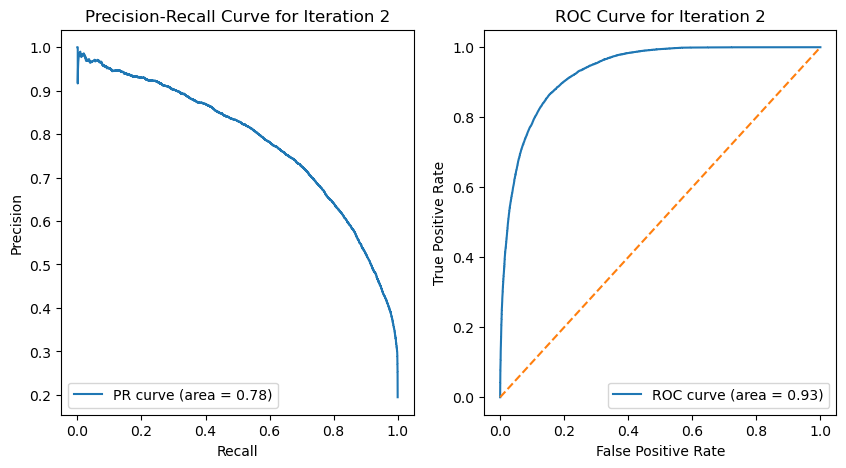

Confusion Matrix:
 [[41810  2159]
 [ 3810  6810]]
--- Iteration 3 ---
Parameters: n_estimators=950, learning_rate=0.07, max_depth=6, min_samples_split=12, min_samples_leaf=4, max_features=None, subsample=0.9


KeyboardInterrupt: 

In [34]:
import itertools
import numpy as np
import random
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Adjusted hyperparameters based on best results
n_estimators_options = np.linspace(800, 1000, 5, dtype=int)  # Focusing around 900
learning_rate_options = np.linspace(0.05, 0.1, 6)           # Narrowing around 0.073
max_depth_options = np.linspace(6, 10, 5, dtype=int)        # Focusing around depth 8
min_samples_split_options = np.linspace(8, 12, 5, dtype=int) # Narrowing around 10
min_samples_leaf_options = np.linspace(4, 6, 3, dtype=int)   # Focusing around 5
max_features_options = ['sqrt', 'log2', None]               # Keeping as is
subsample_options = np.linspace(0.6, 1.0, 5)                # Keeping as is

# Create combinations
all_combinations = list(itertools.product(n_estimators_options, learning_rate_options, max_depth_options, min_samples_split_options, min_samples_leaf_options, max_features_options, subsample_options))

# Select a number of combinations randomly
selected_combinations = random.sample(all_combinations, 20)

# Dictionary to store results
results = {}

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Iterate over the selected combinations
for i, combo in enumerate(selected_combinations, 1):
    n_estimators, learning_rate, max_depth, min_samples_split, min_samples_leaf, max_features, subsample = combo
    print(f"--- Iteration {i} ---")
    print(f"Parameters: n_estimators={n_estimators}, learning_rate={learning_rate}, max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}, max_features={max_features}, subsample={subsample}")

    # Initialize and configure the Gradient Boosting model
    gb_model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, subsample=subsample, random_state=42)
    
    # Train the model
    gb_model.fit(X_train_scaled, y_train)

    # Predict probabilities for the test set
    y_probs = gb_model.predict_proba(X_test_scaled)[:, 1]

    # Calculate precision, recall, and PR AUC
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    pr_auc = auc(recall, precision)

    # Calculate FPR, TPR, and ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # Generate and store the classification report, PR AUC, and ROC AUC
    y_pred_gb = gb_model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred_gb)
    results[f"Iteration {i}"] = {"Report": report, "PR AUC": pr_auc, "ROC AUC": roc_auc}
    print(report)
    print(f"Precision-Recall AUC: {pr_auc}")
    print(f"ROC AUC: {roc_auc}")

    # Plot the Precision-Recall curve
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for Iteration {i}')
    plt.legend(loc="lower left")

    # Plot the ROC curve
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Iteration {i}')
    plt.legend(loc="lower right")
    plt.show()

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred_gb)
    print("Confusion Matrix:\n", cm)

# 'results' now contains the classification report, PR AUC, and ROC AUC for each iteration


In [ ]:
#XGBoost (Extreme Gradient Boosting)

In [21]:
import itertools
import random
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Highly expanded hyperparameters for XGBoost
n_estimators_options = [50, 100, 200, 300, 400, 500, 600, 700, 800]  # More options for the number of boosting rounds
learning_rate_options = [0.4, 0.3, 0.2, 0.1, 0.01, 0.005, 0.001]  # More options for step size shrinkage
max_depth_options = [2, 4, 6, 8, 10, 12, 14, 16]  # More options for maximum tree depth
subsample_options = [0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # More options for subsample ratio of the training instances
colsample_bytree_options = [0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # More options for subsample ratio of columns
gamma_options = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]  # More options for gamma
min_child_weight_options = [0, 1, 2, 3, 4, 5, 6, 7, 8]  # More options for minimum sum of instance weight needed in a child
reg_alpha_options = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]  # More options for L1 regularization term on weights
reg_lambda_options = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]  # Introducing L2 regularization term on weights

# Create combinations of all hyperparameters
all_combinations = list(itertools.product(n_estimators_options, learning_rate_options, max_depth_options, subsample_options, colsample_bytree_options, gamma_options, min_child_weight_options, reg_alpha_options, reg_lambda_options))

# Select a number of combinations randomly
selected_combinations = random.sample(all_combinations, 30)  # Adjust as needed

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# Iterate over the selected combinations
for i, combo in enumerate(selected_combinations, 1):
    (n_estimators, learning_rate, max_depth, subsample, colsample_bytree, gamma, min_child_weight, reg_alpha, reg_lambda) = combo
    print(f"--- Iteration {i} ---")
    print(f"Parameters: n_estimators={n_estimators}, learning_rate={learning_rate}, max_depth={max_depth}, subsample={subsample}, colsample_bytree={colsample_bytree}, gamma={gamma}, min_child_weight={min_child_weight}, reg_alpha={reg_alpha}, reg_lambda={reg_lambda}")

    # Initialize and configure the XGBoost model
    xgb_model = xgb.XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, subsample=subsample, colsample_bytree=colsample_bytree, gamma=gamma, min_child_weight=min_child_weight, reg_alpha=reg_alpha, reg_lambda=reg_lambda, use_label_encoder=False, eval_metric='logloss')

    # Train the model
    xgb_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_xgb = xgb_model.predict(X_test_scaled)

    # Generate and print the classification report
    report = classification_report(y_test, y_pred_xgb)
    print(report)

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred_xgb)
    print("Confusion Matrix:\n", cm)

# 'results' now contains the classification report for each iteration


--- Iteration 1 ---
Parameters: n_estimators=800, learning_rate=0.1, max_depth=14, subsample=0.8, colsample_bytree=0.1, gamma=0.2, min_child_weight=6, reg_alpha=0.3, reg_lambda=0.1
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.76      0.63      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.79      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Confusion Matrix:
 [[41822  2147]
 [ 3919  6701]]
--- Iteration 2 ---
Parameters: n_estimators=400, learning_rate=0.01, max_depth=4, subsample=0.7, colsample_bytree=0.7, gamma=0, min_child_weight=5, reg_alpha=0.6, reg_lambda=0
              precision    recall  f1-score   support

           0       0.89      0.96      0.93     43969
           1       0.77      0.51      0.61     10620

    accuracy                           0.88     54589
   macro avg       0.83      0.74      0.77    

C:\Users\IM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.81      1.00      0.89     43969
           1       0.00      0.00      0.00     10620

    accuracy                           0.81     54589
   macro avg       0.40      0.50      0.45     54589
weighted avg       0.65      0.81      0.72     54589

Confusion Matrix:
 [[43969     0]
 [10620     0]]
--- Iteration 9 ---
Parameters: n_estimators=100, learning_rate=0.01, max_depth=6, subsample=0.5, colsample_bytree=1.0, gamma=0.1, min_child_weight=5, reg_alpha=0.3, reg_lambda=0.1
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     43969
           1       0.85      0.28      0.42     10620

    accuracy                           0.85     54589
   macro avg       0.85      0.63      0.67     54589
weighted avg       0.85      0.85      0.82     54589

Confusion Matrix:
 [[43459   510]
 [ 7679  2941]]
--- Iteration 10 ---
Parameters: n_estimators=600, learning_rate=

C:\Users\IM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.81      1.00      0.89     43969
           1       0.00      0.00      0.00     10620

    accuracy                           0.81     54589
   macro avg       0.40      0.50      0.45     54589
weighted avg       0.65      0.81      0.72     54589

Confusion Matrix:
 [[43969     0]
 [10620     0]]
--- Iteration 20 ---
Parameters: n_estimators=400, learning_rate=0.005, max_depth=14, subsample=0.7, colsample_bytree=0.7, gamma=0.1, min_child_weight=4, reg_alpha=0.6, reg_lambda=0
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     43969
           1       0.80      0.57      0.66     10620

    accuracy                           0.89     54589
   macro avg       0.85      0.77      0.80     54589
weighted avg       0.88      0.89      0.88     54589

Confusion Matrix:
 [[42494  1475]
 [ 4619  6001]]
--- Iteration 21 ---
Parameters: n_estimators=50, learning_rate=

C:\Users\IM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.81      1.00      0.89     43969
           1       0.00      0.00      0.00     10620

    accuracy                           0.81     54589
   macro avg       0.40      0.50      0.45     54589
weighted avg       0.65      0.81      0.72     54589

Confusion Matrix:
 [[43969     0]
 [10620     0]]
--- Iteration 22 ---
Parameters: n_estimators=400, learning_rate=0.1, max_depth=2, subsample=1.0, colsample_bytree=0.1, gamma=0.3, min_child_weight=0, reg_alpha=0.1, reg_lambda=0.4
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     43969
           1       0.76      0.59      0.66     10620

    accuracy                           0.88     54589
   macro avg       0.83      0.77      0.80     54589
weighted avg       0.88      0.88      0.88     54589

Confusion Matrix:
 [[42006  1963]
 [ 4393  6227]]
--- Iteration 23 ---
Parameters: n_estimators=400, learning_rate=

C:\Users\IM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.81      1.00      0.89     43969
           1       0.00      0.00      0.00     10620

    accuracy                           0.81     54589
   macro avg       0.40      0.50      0.45     54589
weighted avg       0.65      0.81      0.72     54589

Confusion Matrix:
 [[43969     0]
 [10620     0]]
--- Iteration 25 ---
Parameters: n_estimators=800, learning_rate=0.005, max_depth=6, subsample=0.9, colsample_bytree=0.7, gamma=0.3, min_child_weight=8, reg_alpha=0, reg_lambda=0
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     43969
           1       0.77      0.56      0.65     10620

    accuracy                           0.88     54589
   macro avg       0.84      0.76      0.79     54589
weighted avg       0.88      0.88      0.88     54589

Confusion Matrix:
 [[42220  1749]
 [ 4636  5984]]
--- Iteration 26 ---
Parameters: n_estimators=500, learning_rate=0.

C:\Users\IM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.81      1.00      0.89     43969
           1       0.00      0.00      0.00     10620

    accuracy                           0.81     54589
   macro avg       0.40      0.50      0.45     54589
weighted avg       0.65      0.81      0.72     54589

Confusion Matrix:
 [[43969     0]
 [10620     0]]
--- Iteration 28 ---
Parameters: n_estimators=800, learning_rate=0.2, max_depth=2, subsample=0.6, colsample_bytree=0.1, gamma=0.2, min_child_weight=6, reg_alpha=0.1, reg_lambda=0.2
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.76      0.62      0.68     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.78      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Confusion Matrix:
 [[41856  2113]
 [ 4072  6548]]
--- Iteration 29 ---
Parameters: n_estimators=700, learning_rate=

In [ ]:
import itertools
import random
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Adjusted hyperparameters based on best results
n_estimators_options = np.linspace(700, 900, 5, dtype=int)  # Focusing around 800
learning_rate_options = np.linspace(0.1, 0.3, 5)            # Narrowing around 0.2
max_depth_options = [1, 2, 3, 4, 5]                        # Focusing around depth 2
subsample_options = np.linspace(0.5, 0.7, 5)               # Narrowing around 0.6
colsample_bytree_options = np.linspace(0.05, 0.15, 5)      # Narrowing around 0.1
gamma_options = np.linspace(0.1, 0.3, 5)                   # Narrowing around 0.2
min_child_weight_options = [4, 5, 6, 7, 8]                 # Focusing around 6
reg_alpha_options = np.linspace(0, 0.2, 5)                 # Narrowing around 0.1
reg_lambda_options = np.linspace(0.1, 0.3, 5)              # Narrowing around 0.2

# Create combinations of all hyperparameters
all_combinations = list(itertools.product(n_estimators_options, learning_rate_options, max_depth_options, subsample_options, colsample_bytree_options, gamma_options, min_child_weight_options, reg_alpha_options, reg_lambda_options))

# Select a number of combinations randomly
selected_combinations = random.sample(all_combinations, 30)  # Adjust as needed

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# Iterate over the selected combinations
for i, combo in enumerate(selected_combinations, 1):
    (n_estimators, learning_rate, max_depth, subsample, colsample_bytree, gamma, min_child_weight, reg_alpha, reg_lambda) = combo
    print(f"--- Iteration {i} ---")
    print(f"Parameters: n_estimators={n_estimators}, learning_rate={learning_rate}, max_depth={max_depth}, subsample={subsample}, colsample_bytree={colsample_bytree}, gamma={gamma}, min_child_weight={min_child_weight}, reg_alpha={reg_alpha}, reg_lambda={reg_lambda}")

    # Initialize and configure the XGBoost model
    xgb_model = xgb.XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, subsample=subsample, colsample_bytree=colsample_bytree, gamma=gamma, min_child_weight=min_child_weight, reg_alpha=reg_alpha, reg_lambda=reg_lambda, use_label_encoder=False, eval_metric='logloss')

    # Train the model
    xgb_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_xgb = xgb_model.predict(X_test_scaled)

    # Generate and print the classification report
    report = classification_report(y_test, y_pred_xgb)
    print(report)

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred_xgb)
    print("Confusion Matrix:\n", cm)

# 'results' now contains the classification report for each iteration


--- Iteration 1 ---
Parameters: n_estimators=900, learning_rate=0.1, max_depth=4, subsample=0.55, colsample_bytree=0.15, gamma=0.3, min_child_weight=6, reg_alpha=0.15000000000000002, reg_lambda=0.2
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.76      0.63      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.79      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Precision-Recall AUC: 0.7780653531338045
ROC AUC: 0.9321571547647912


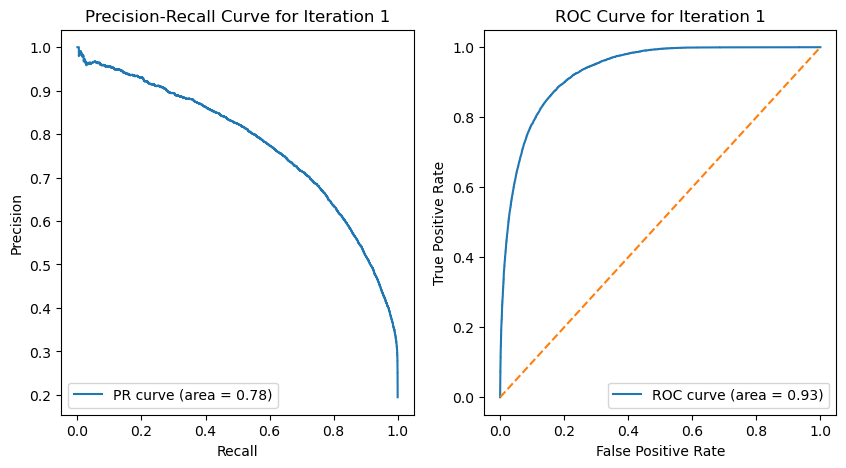

Confusion Matrix:
 [[41805  2164]
 [ 3914  6706]]
--- Iteration 2 ---
Parameters: n_estimators=800, learning_rate=0.2, max_depth=5, subsample=0.55, colsample_bytree=0.1, gamma=0.2, min_child_weight=4, reg_alpha=0.15000000000000002, reg_lambda=0.3
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.75      0.64      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.79      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Precision-Recall AUC: 0.7698294112835085
ROC AUC: 0.9291275795705921


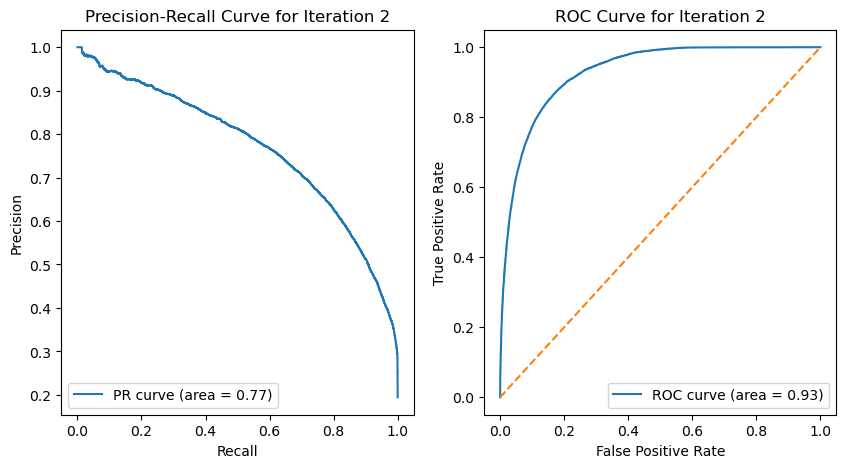

Confusion Matrix:
 [[41695  2274]
 [ 3865  6755]]
--- Iteration 3 ---
Parameters: n_estimators=850, learning_rate=0.1, max_depth=3, subsample=0.55, colsample_bytree=0.125, gamma=0.15, min_child_weight=7, reg_alpha=0.2, reg_lambda=0.3
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.76      0.62      0.68     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.79      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Precision-Recall AUC: 0.7732035192596923
ROC AUC: 0.9306651913077435


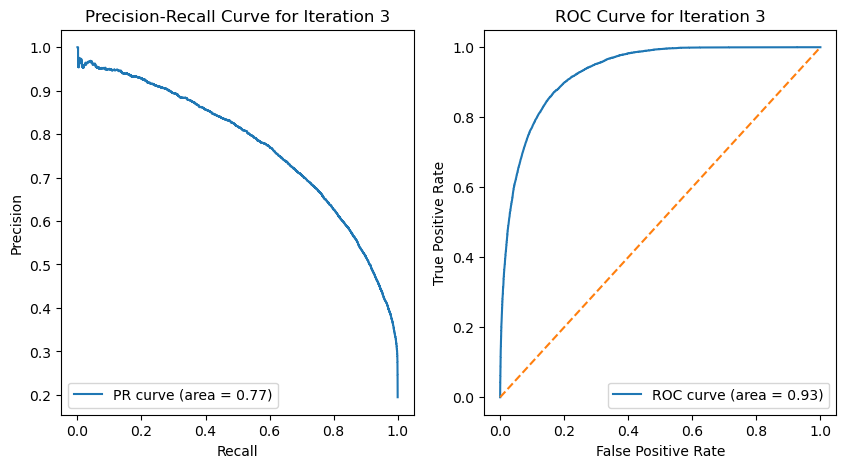

Confusion Matrix:
 [[41872  2097]
 [ 4056  6564]]
--- Iteration 4 ---
Parameters: n_estimators=800, learning_rate=0.15, max_depth=5, subsample=0.6499999999999999, colsample_bytree=0.075, gamma=0.15, min_child_weight=4, reg_alpha=0.2, reg_lambda=0.25
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.76      0.63      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.79      0.81     54589
weighted avg       0.88      0.89      0.89     54589

Precision-Recall AUC: 0.7747597249433534
ROC AUC: 0.9310734002842871


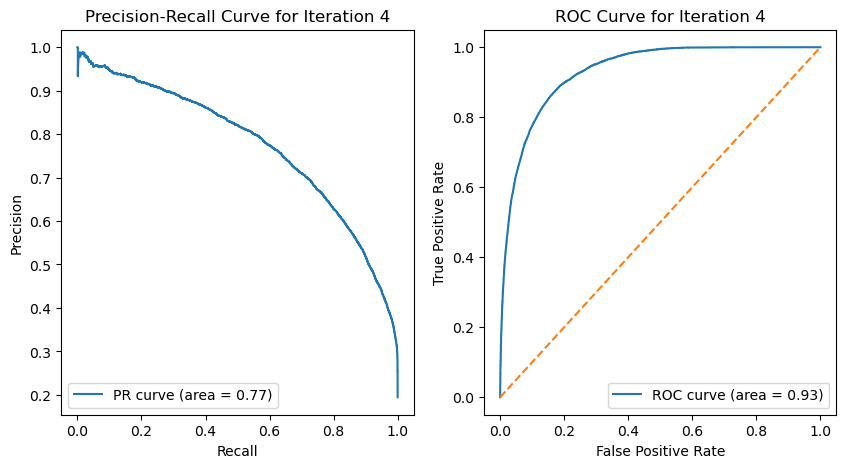

Confusion Matrix:
 [[41798  2171]
 [ 3885  6735]]
--- Iteration 5 ---
Parameters: n_estimators=800, learning_rate=0.25, max_depth=4, subsample=0.7, colsample_bytree=0.1, gamma=0.25, min_child_weight=5, reg_alpha=0.2, reg_lambda=0.1
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.75      0.63      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.79      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Precision-Recall AUC: 0.7686994988182518
ROC AUC: 0.9292829963791902


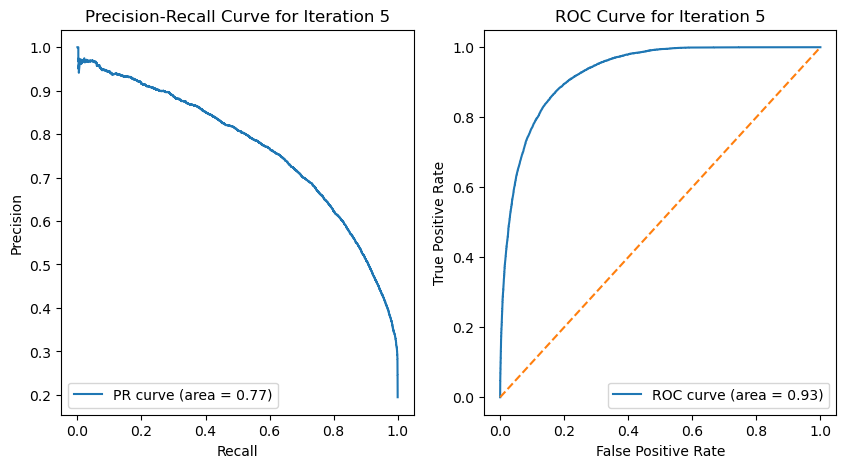

Confusion Matrix:
 [[41749  2220]
 [ 3906  6714]]
--- Iteration 6 ---
Parameters: n_estimators=850, learning_rate=0.15, max_depth=3, subsample=0.5, colsample_bytree=0.05, gamma=0.1, min_child_weight=5, reg_alpha=0.2, reg_lambda=0.15
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.76      0.61      0.68     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.78      0.80     54589
weighted avg       0.88      0.89      0.88     54589

Precision-Recall AUC: 0.7671999713731312
ROC AUC: 0.9284319088191694


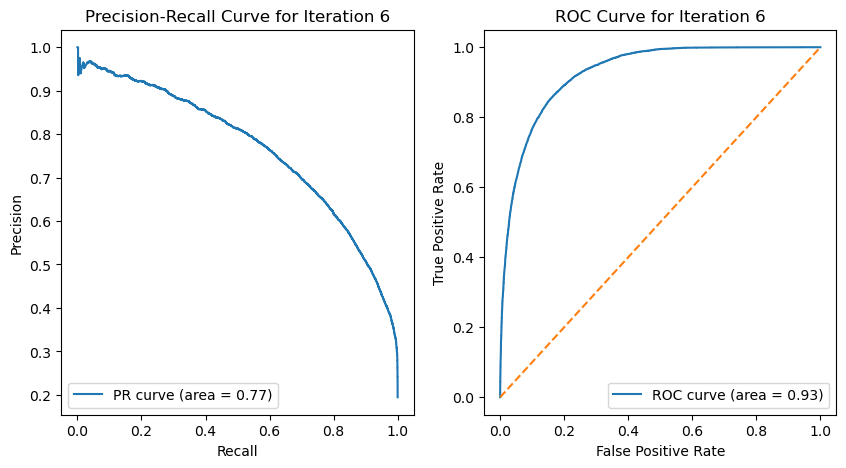

Confusion Matrix:
 [[41868  2101]
 [ 4116  6504]]
--- Iteration 7 ---
Parameters: n_estimators=900, learning_rate=0.15, max_depth=4, subsample=0.5, colsample_bytree=0.125, gamma=0.25, min_child_weight=7, reg_alpha=0.15000000000000002, reg_lambda=0.25
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.75      0.63      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.79      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Precision-Recall AUC: 0.7735164874603941
ROC AUC: 0.9309645312081928


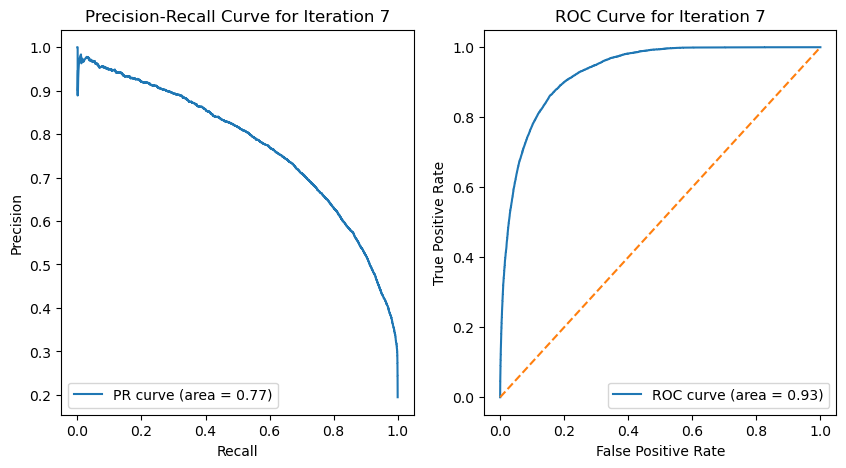

Confusion Matrix:
 [[41766  2203]
 [ 3908  6712]]
--- Iteration 8 ---
Parameters: n_estimators=850, learning_rate=0.1, max_depth=1, subsample=0.6, colsample_bytree=0.05, gamma=0.1, min_child_weight=4, reg_alpha=0.0, reg_lambda=0.15
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     43969
           1       0.76      0.57      0.65     10620

    accuracy                           0.88     54589
   macro avg       0.83      0.76      0.79     54589
weighted avg       0.87      0.88      0.87     54589

Precision-Recall AUC: 0.7463983164718762
ROC AUC: 0.9214951884222145


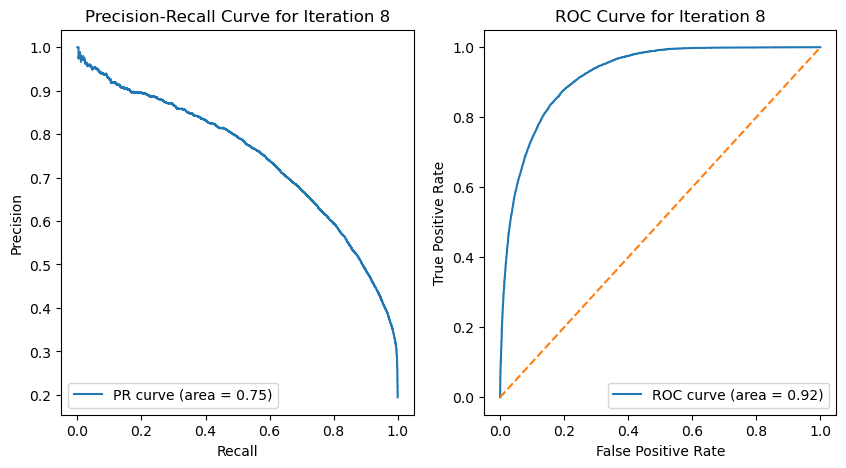

Confusion Matrix:
 [[42053  1916]
 [ 4579  6041]]
--- Iteration 9 ---
Parameters: n_estimators=750, learning_rate=0.25, max_depth=3, subsample=0.55, colsample_bytree=0.15, gamma=0.3, min_child_weight=5, reg_alpha=0.2, reg_lambda=0.25
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.75      0.63      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.79      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Precision-Recall AUC: 0.7701899242398723
ROC AUC: 0.929804424997427


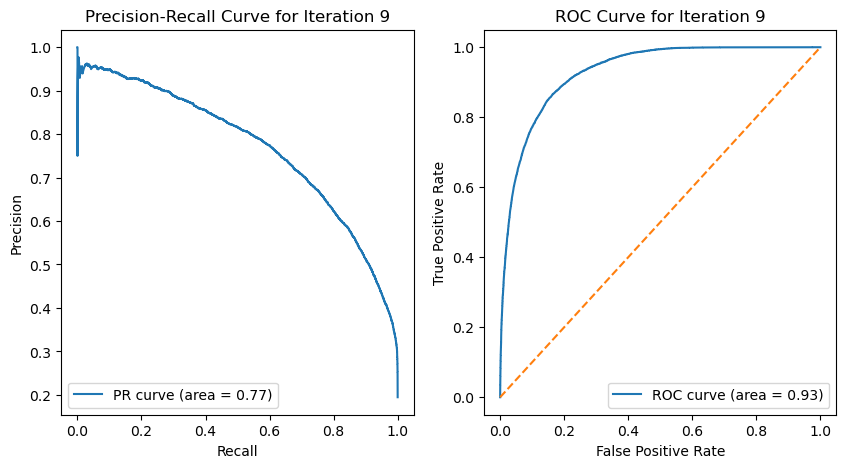

Confusion Matrix:
 [[41759  2210]
 [ 3913  6707]]
--- Iteration 10 ---
Parameters: n_estimators=700, learning_rate=0.25, max_depth=2, subsample=0.55, colsample_bytree=0.1, gamma=0.3, min_child_weight=5, reg_alpha=0.1, reg_lambda=0.3
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.75      0.62      0.68     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.78      0.80     54589
weighted avg       0.88      0.89      0.88     54589

Precision-Recall AUC: 0.7671577279244958
ROC AUC: 0.9287314800073787


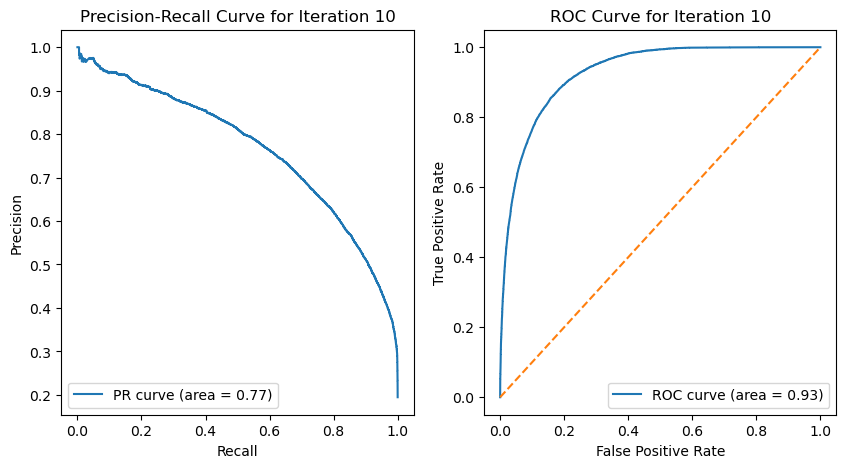

Confusion Matrix:
 [[41831  2138]
 [ 4078  6542]]
--- Iteration 11 ---
Parameters: n_estimators=800, learning_rate=0.25, max_depth=4, subsample=0.6499999999999999, colsample_bytree=0.15, gamma=0.3, min_child_weight=8, reg_alpha=0.15000000000000002, reg_lambda=0.2
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.74      0.63      0.68     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.79      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Precision-Recall AUC: 0.7685050624859276
ROC AUC: 0.9288023579273174


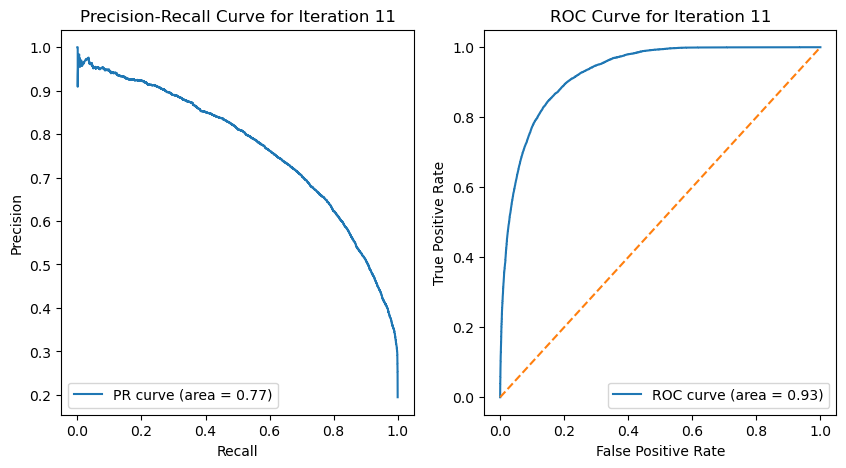

Confusion Matrix:
 [[41670  2299]
 [ 3917  6703]]
--- Iteration 12 ---
Parameters: n_estimators=750, learning_rate=0.2, max_depth=4, subsample=0.6, colsample_bytree=0.075, gamma=0.3, min_child_weight=7, reg_alpha=0.1, reg_lambda=0.3
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.75      0.63      0.68     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.79      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Precision-Recall AUC: 0.7725939247953644
ROC AUC: 0.9300358380384331


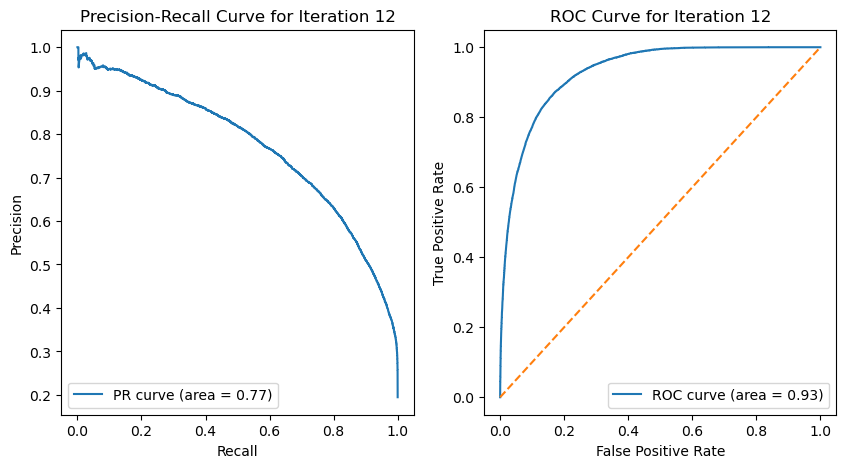

Confusion Matrix:
 [[41779  2190]
 [ 3959  6661]]
--- Iteration 13 ---
Parameters: n_estimators=750, learning_rate=0.1, max_depth=4, subsample=0.7, colsample_bytree=0.1, gamma=0.1, min_child_weight=7, reg_alpha=0.1, reg_lambda=0.3
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.76      0.62      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.79      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Precision-Recall AUC: 0.7753887277736086
ROC AUC: 0.9311486544684646


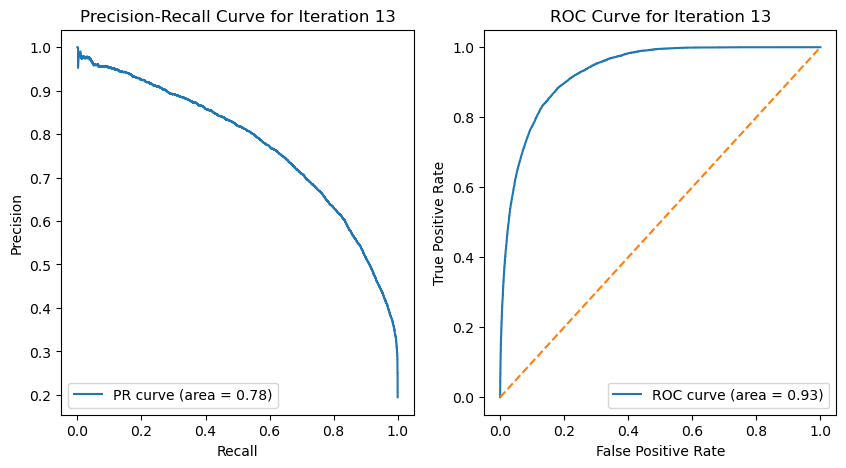

Confusion Matrix:
 [[41866  2103]
 [ 3984  6636]]
--- Iteration 14 ---
Parameters: n_estimators=750, learning_rate=0.25, max_depth=1, subsample=0.55, colsample_bytree=0.05, gamma=0.15, min_child_weight=7, reg_alpha=0.05, reg_lambda=0.1
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.75      0.59      0.66     10620

    accuracy                           0.88     54589
   macro avg       0.83      0.77      0.80     54589
weighted avg       0.88      0.88      0.88     54589

Precision-Recall AUC: 0.7548381125286585
ROC AUC: 0.9239129186163904


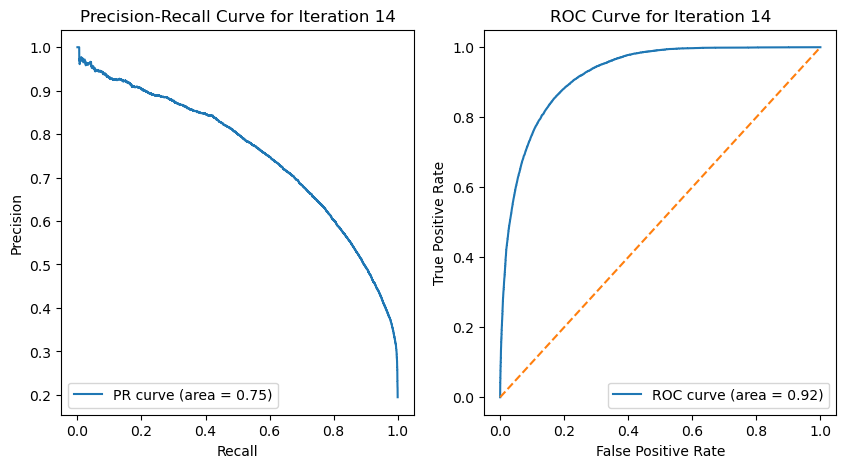

Confusion Matrix:
 [[41878  2091]
 [ 4314  6306]]
--- Iteration 15 ---
Parameters: n_estimators=750, learning_rate=0.25, max_depth=4, subsample=0.7, colsample_bytree=0.15, gamma=0.2, min_child_weight=4, reg_alpha=0.05, reg_lambda=0.1
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.75      0.63      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.79      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Precision-Recall AUC: 0.7707598752392291
ROC AUC: 0.9292280751731479


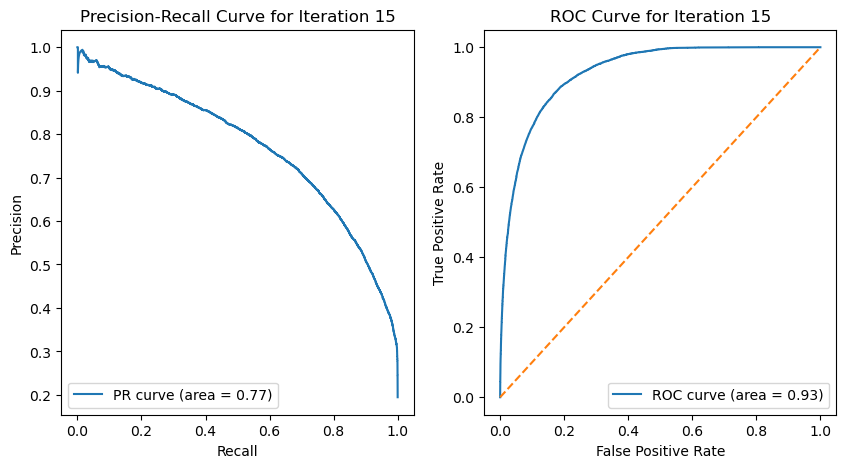

Confusion Matrix:
 [[41730  2239]
 [ 3919  6701]]
--- Iteration 16 ---
Parameters: n_estimators=800, learning_rate=0.1, max_depth=3, subsample=0.55, colsample_bytree=0.075, gamma=0.1, min_child_weight=6, reg_alpha=0.0, reg_lambda=0.15
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.76      0.61      0.68     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.78      0.80     54589
weighted avg       0.88      0.89      0.88     54589

Precision-Recall AUC: 0.7699158417781536
ROC AUC: 0.929317228038467


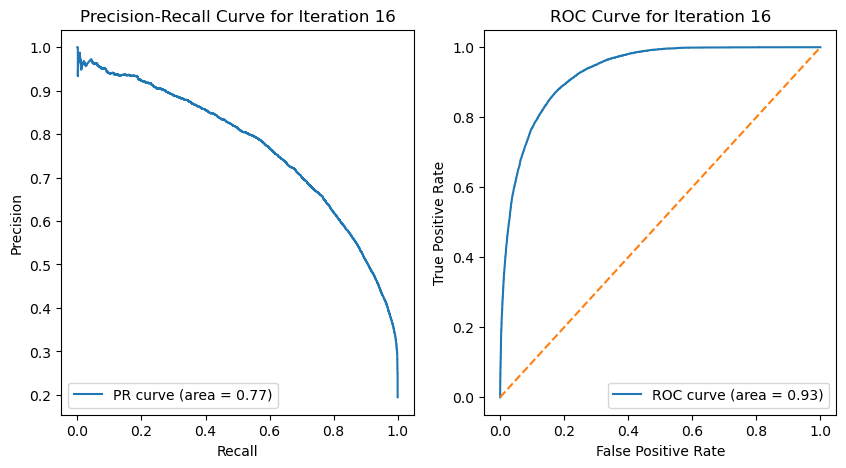

Confusion Matrix:
 [[41886  2083]
 [ 4105  6515]]
--- Iteration 17 ---
Parameters: n_estimators=700, learning_rate=0.3, max_depth=4, subsample=0.6499999999999999, colsample_bytree=0.075, gamma=0.3, min_child_weight=8, reg_alpha=0.15000000000000002, reg_lambda=0.2
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.74      0.63      0.68     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.79      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Precision-Recall AUC: 0.7675004813833854
ROC AUC: 0.928477993976153


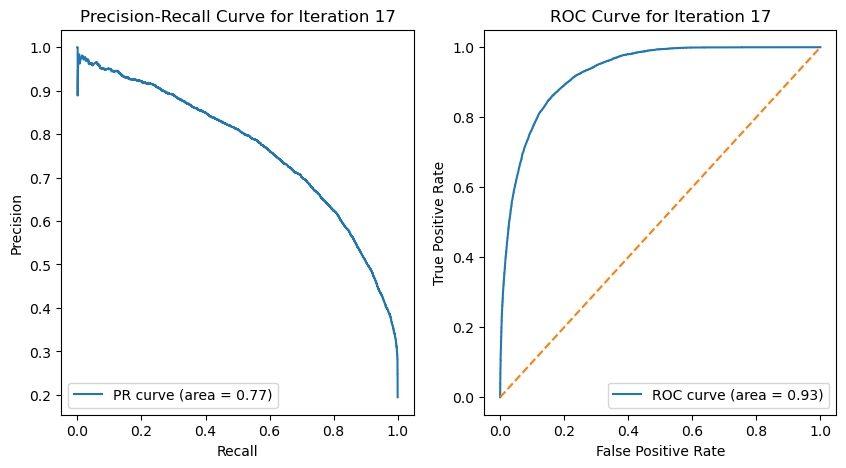

Confusion Matrix:
 [[41671  2298]
 [ 3950  6670]]
--- Iteration 18 ---
Parameters: n_estimators=750, learning_rate=0.1, max_depth=2, subsample=0.6, colsample_bytree=0.1, gamma=0.25, min_child_weight=4, reg_alpha=0.15000000000000002, reg_lambda=0.15
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.76      0.60      0.67     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.78      0.80     54589
weighted avg       0.88      0.89      0.88     54589

Precision-Recall AUC: 0.7627088275910399
ROC AUC: 0.9273040287029823


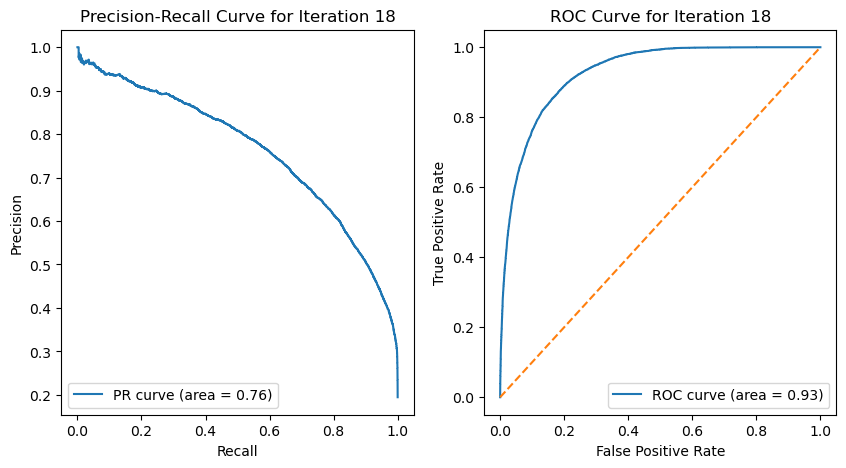

Confusion Matrix:
 [[41918  2051]
 [ 4212  6408]]
--- Iteration 19 ---
Parameters: n_estimators=750, learning_rate=0.2, max_depth=5, subsample=0.5, colsample_bytree=0.125, gamma=0.1, min_child_weight=4, reg_alpha=0.0, reg_lambda=0.2
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.74      0.64      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.79      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Precision-Recall AUC: 0.7680226964150054
ROC AUC: 0.9286615979097412


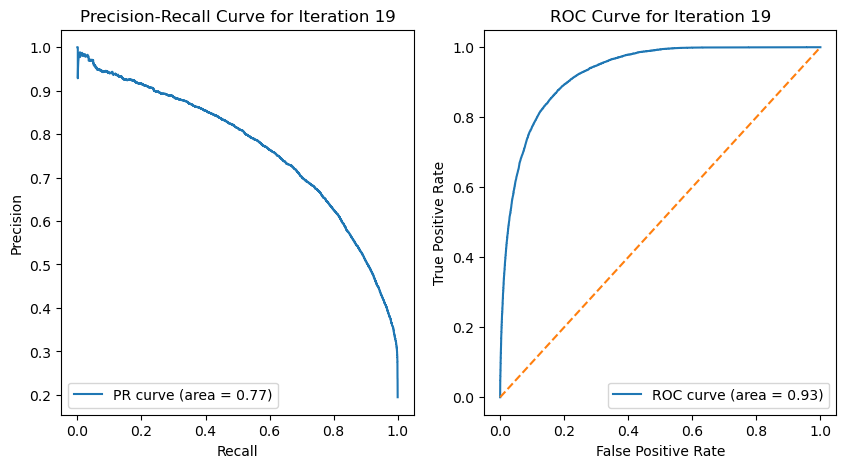

Confusion Matrix:
 [[41644  2325]
 [ 3862  6758]]
--- Iteration 20 ---
Parameters: n_estimators=700, learning_rate=0.1, max_depth=4, subsample=0.6, colsample_bytree=0.05, gamma=0.2, min_child_weight=7, reg_alpha=0.2, reg_lambda=0.3
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.76      0.60      0.67     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.78      0.80     54589
weighted avg       0.88      0.89      0.88     54589

Precision-Recall AUC: 0.767088409183211
ROC AUC: 0.9279298227106505


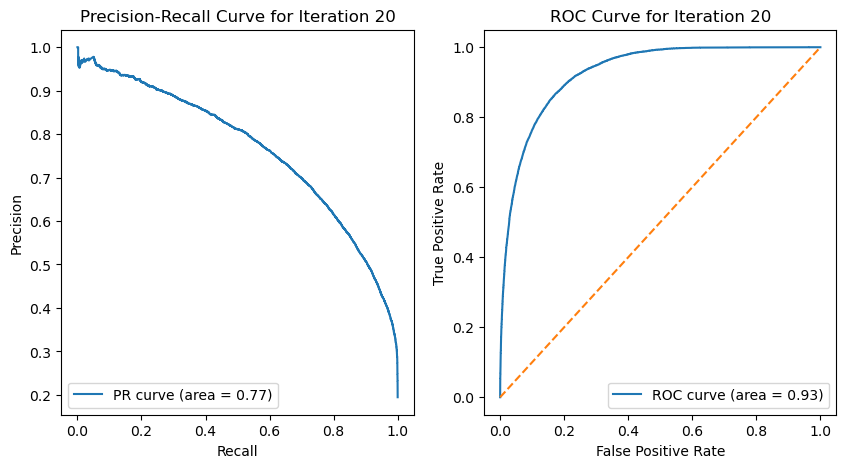

Confusion Matrix:
 [[41926  2043]
 [ 4199  6421]]
--- Iteration 21 ---
Parameters: n_estimators=850, learning_rate=0.25, max_depth=1, subsample=0.7, colsample_bytree=0.125, gamma=0.25, min_child_weight=5, reg_alpha=0.15000000000000002, reg_lambda=0.1
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.75      0.60      0.67     10620

    accuracy                           0.88     54589
   macro avg       0.83      0.77      0.80     54589
weighted avg       0.88      0.88      0.88     54589

Precision-Recall AUC: 0.756232368203377
ROC AUC: 0.9245345119671928


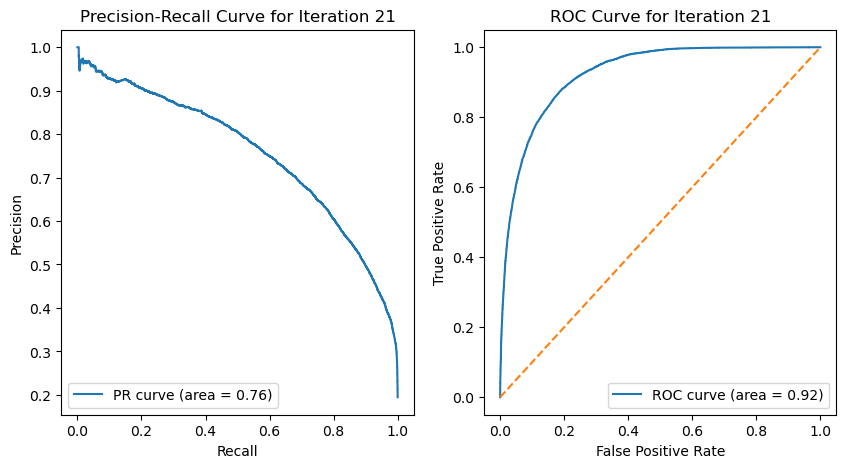

Confusion Matrix:
 [[41870  2099]
 [ 4284  6336]]
--- Iteration 22 ---
Parameters: n_estimators=800, learning_rate=0.15, max_depth=5, subsample=0.5, colsample_bytree=0.125, gamma=0.1, min_child_weight=7, reg_alpha=0.2, reg_lambda=0.15
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.75      0.64      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.79      0.81     54589
weighted avg       0.88      0.89      0.89     54589

Precision-Recall AUC: 0.772769037029078
ROC AUC: 0.9304963780122608


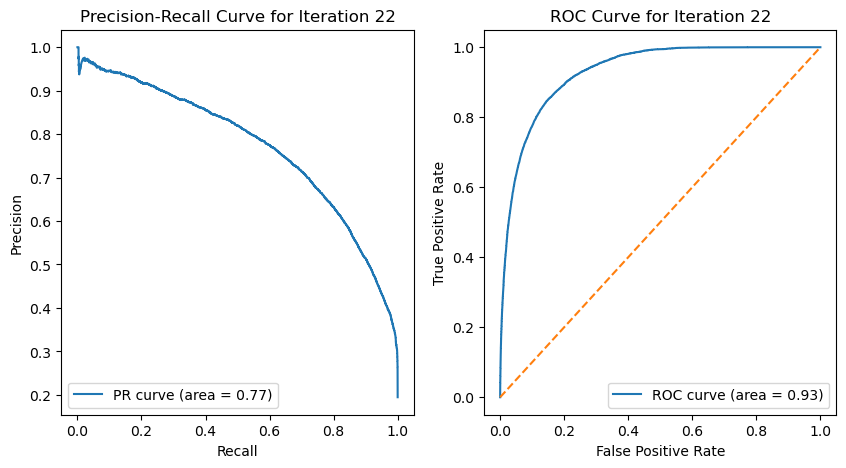

Confusion Matrix:
 [[41743  2226]
 [ 3853  6767]]
--- Iteration 23 ---
Parameters: n_estimators=800, learning_rate=0.15, max_depth=4, subsample=0.7, colsample_bytree=0.15, gamma=0.15, min_child_weight=8, reg_alpha=0.2, reg_lambda=0.3
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.75      0.64      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.79      0.81     54589
weighted avg       0.88      0.89      0.89     54589

Precision-Recall AUC: 0.7763369103510163
ROC AUC: 0.9317407297188796


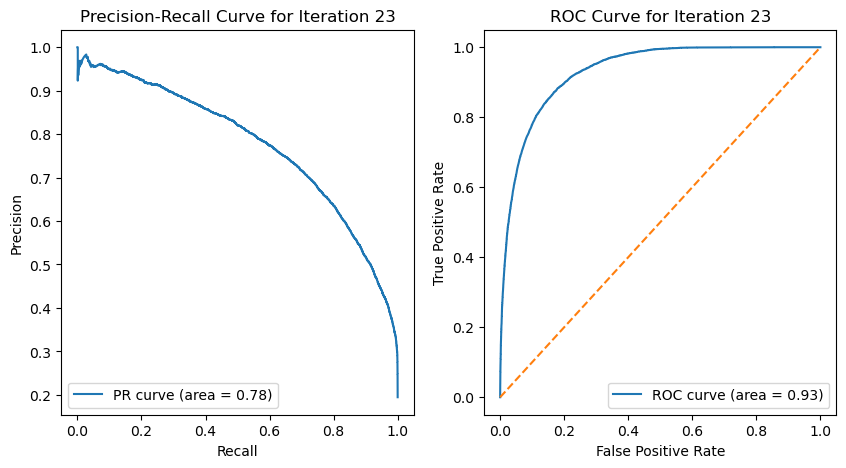

Confusion Matrix:
 [[41757  2212]
 [ 3858  6762]]
--- Iteration 24 ---
Parameters: n_estimators=700, learning_rate=0.15, max_depth=4, subsample=0.6, colsample_bytree=0.15, gamma=0.3, min_child_weight=8, reg_alpha=0.1, reg_lambda=0.15


KeyboardInterrupt: 

In [35]:
import itertools
import random
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Adjusted hyperparameters based on best results
n_estimators_options = np.linspace(700, 900, 5, dtype=int)  # Focusing around 800
learning_rate_options = np.linspace(0.1, 0.3, 5)            # Narrowing around 0.2
max_depth_options = [1, 2, 3, 4, 5]                        # Focusing around depth 2
subsample_options = np.linspace(0.5, 0.7, 5)               # Narrowing around 0.6
colsample_bytree_options = np.linspace(0.05, 0.15, 5)      # Narrowing around 0.1
gamma_options = np.linspace(0.1, 0.3, 5)                   # Narrowing around 0.2
min_child_weight_options = [4, 5, 6, 7, 8]                 # Focusing around 6
reg_alpha_options = np.linspace(0, 0.2, 5)                 # Narrowing around 0.1
reg_lambda_options = np.linspace(0.1, 0.3, 5)              # Narrowing around 0.2

# Create combinations of all hyperparameters
all_combinations = list(itertools.product(n_estimators_options, learning_rate_options, max_depth_options, subsample_options, colsample_bytree_options, gamma_options, min_child_weight_options, reg_alpha_options, reg_lambda_options))

# Select a number of combinations randomly
selected_combinations = random.sample(all_combinations, 30)  # Adjust as needed

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Dictionary to store results
results = {}

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Iterate over the selected combinations
for i, combo in enumerate(selected_combinations, 1):
    # Unpack the combo
    (n_estimators, learning_rate, max_depth, subsample, colsample_bytree, gamma, min_child_weight, reg_alpha, reg_lambda) = combo
    print(f"--- Iteration {i} ---")
    print(f"Parameters: n_estimators={n_estimators}, learning_rate={learning_rate}, max_depth={max_depth}, subsample={subsample}, colsample_bytree={colsample_bytree}, gamma={gamma}, min_child_weight={min_child_weight}, reg_alpha={reg_alpha}, reg_lambda={reg_lambda}")

    # Initialize the XGBoost model
    xgb_model = xgb.XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, subsample=subsample, colsample_bytree=colsample_bytree, gamma=gamma, min_child_weight=min_child_weight, reg_alpha=reg_alpha, reg_lambda=reg_lambda, use_label_encoder=False, eval_metric='logloss')

    # Train the model
    xgb_model.fit(X_train_scaled, y_train)

    # Predict probabilities for the test set
    y_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]

    # Calculate precision, recall, and PR AUC
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    pr_auc = auc(recall, precision)

    # Calculate FPR, TPR, and ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # Generate and store the classification report, PR AUC, and ROC AUC
    y_pred_xgb = xgb_model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred_xgb)
    results[f"Iteration {i}"] = {"Report": report, "PR AUC": pr_auc, "ROC AUC": roc_auc}
    print(report)
    print(f"Precision-Recall AUC: {pr_auc}")
    print(f"ROC AUC: {roc_auc}")

    # Plot the Precision-Recall curve
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for Iteration {i}')
    plt.legend(loc="lower left")

    # Plot the ROC curve
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Iteration {i}')
    plt.legend(loc="lower right")
    plt.show()

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred_xgb)
    print("Confusion Matrix:\n", cm)

# 'results' now contains the classification report, PR AUC, and ROC AUC for each iteration


In [ ]:
#AdaBoost (Adaptive Boosting)

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Expanded hyperparameters for AdaBoost
base_estimator_depth_options = range(1, 10)  # Increased range for base estimator depth
n_estimators_options = range(50, 400, 50)    # Increased range for number of boosting stages
learning_rate_options = [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]  # Expanded learning rates

# Create combinations
all_combinations = list(itertools.product(base_estimator_depth_options, n_estimators_options, learning_rate_options))

# Select a number of combinations randomly
selected_combinations = random.sample(all_combinations, 20)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# Iterate over the selected combinations
for i, (base_depth, n_estimators, learning_rate) in enumerate(selected_combinations, 1):
    print(f"--- Iteration {i} ---")
    print(f"Parameters: base_depth={base_depth}, n_estimators={n_estimators}, learning_rate={learning_rate}")

    # Initialize and configure the AdaBoost model
    base_estimator = DecisionTreeClassifier(max_depth=base_depth)
    ada_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
    
    # Train the model
    ada_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_ada = ada_model.predict(X_test_scaled)

    # Generate and store the classification report
    report = classification_report(y_test, y_pred_ada)
    results[f"Iteration {i}"] = report
    print(report)

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred_ada)
    print("Confusion Matrix:\n", cm)

# 'results' now contains the classification report for each iteration


--- Iteration 1 ---
Parameters: base_depth=4, n_estimators=250, learning_rate=0.01


C:\Users\IM\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.88      0.97      0.92     43969
           1       0.78      0.46      0.58     10620

    accuracy                           0.87     54589
   macro avg       0.83      0.71      0.75     54589
weighted avg       0.86      0.87      0.86     54589

Confusion Matrix:
 [[42614  1355]
 [ 5756  4864]]
--- Iteration 2 ---
Parameters: base_depth=2, n_estimators=150, learning_rate=0.2


C:\Users\IM\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.90      0.96      0.93     43969
           1       0.76      0.58      0.66     10620

    accuracy                           0.88     54589
   macro avg       0.83      0.77      0.79     54589
weighted avg       0.88      0.88      0.88     54589

Confusion Matrix:
 [[41999  1970]
 [ 4458  6162]]
--- Iteration 3 ---
Parameters: base_depth=6, n_estimators=150, learning_rate=0.01


C:\Users\IM\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      0.96      0.92     43969
           1       0.77      0.50      0.61     10620

    accuracy                           0.87     54589
   macro avg       0.83      0.73      0.77     54589
weighted avg       0.87      0.87      0.86     54589

Confusion Matrix:
 [[42367  1602]
 [ 5275  5345]]
--- Iteration 4 ---
Parameters: base_depth=1, n_estimators=100, learning_rate=0.2


C:\Users\IM\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.88      0.97      0.92     43969
           1       0.77      0.45      0.57     10620

    accuracy                           0.87     54589
   macro avg       0.83      0.71      0.74     54589
weighted avg       0.86      0.87      0.85     54589

Confusion Matrix:
 [[42569  1400]
 [ 5851  4769]]
--- Iteration 5 ---
Parameters: base_depth=5, n_estimators=350, learning_rate=1.0


C:\Users\IM\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.90      0.92      0.91     43969
           1       0.65      0.59      0.62     10620

    accuracy                           0.86     54589
   macro avg       0.78      0.76      0.77     54589
weighted avg       0.86      0.86      0.86     54589

Confusion Matrix:
 [[40632  3337]
 [ 4306  6314]]
--- Iteration 6 ---
Parameters: base_depth=6, n_estimators=50, learning_rate=0.5


C:\Users\IM\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.73      0.61      0.67     10620

    accuracy                           0.88     54589
   macro avg       0.82      0.78      0.80     54589
weighted avg       0.87      0.88      0.88     54589

Confusion Matrix:
 [[41563  2406]
 [ 4119  6501]]
--- Iteration 7 ---
Parameters: base_depth=6, n_estimators=350, learning_rate=0.1


C:\Users\IM\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.75      0.60      0.67     10620

    accuracy                           0.88     54589
   macro avg       0.83      0.78      0.80     54589
weighted avg       0.88      0.88      0.88     54589

Confusion Matrix:
 [[41820  2149]
 [ 4242  6378]]
--- Iteration 8 ---
Parameters: base_depth=3, n_estimators=150, learning_rate=0.01


C:\Users\IM\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.86      0.98      0.92     43969
           1       0.80      0.34      0.47     10620

    accuracy                           0.85     54589
   macro avg       0.83      0.66      0.69     54589
weighted avg       0.85      0.85      0.83     54589

Confusion Matrix:
 [[43066   903]
 [ 7053  3567]]
--- Iteration 9 ---
Parameters: base_depth=9, n_estimators=50, learning_rate=0.05


C:\Users\IM\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.90      0.95      0.93     43969
           1       0.75      0.58      0.65     10620

    accuracy                           0.88     54589
   macro avg       0.83      0.77      0.79     54589
weighted avg       0.87      0.88      0.87     54589

Confusion Matrix:
 [[41868  2101]
 [ 4440  6180]]
--- Iteration 10 ---
Parameters: base_depth=6, n_estimators=200, learning_rate=0.05


C:\Users\IM\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.76      0.61      0.67     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.78      0.80     54589
weighted avg       0.88      0.89      0.88     54589

Confusion Matrix:
 [[41904  2065]
 [ 4181  6439]]


In [ ]:
#Stacking

--- Iteration 1 ---
Parameters: Base Learners = ['et', 'lgbm', 'lr'], Final Estimator = RidgeClassifier, CV = 10
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
[LightGBM] [Info] Number of positive: 22524, number of negative: 92112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 

C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.76      0.65      0.70     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.80      0.82     54589
weighted avg       0.89      0.89      0.89     54589

Confusion Matrix:
 [[41805  2164]
 [ 3756  6864]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.76      0.65      0.70     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.80      0.82     54589
weighted avg       0.89      0.89      0.89     54589

Confusion Matrix:
 [[41805  2164]
 [ 3756  6864]]
--- Iteration 2 ---
Parameters: Base Learners = ['rf', 'lr', 'gnb'], Final Estimator = RidgeClassifier, CV = 10


C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.76      0.64      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.79      0.81     54589
weighted avg       0.89      0.89      0.89     54589

Confusion Matrix:
 [[41875  2094]
 [ 3849  6771]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.76      0.64      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.79      0.81     54589
weighted avg       0.89      0.89      0.89     54589

Confusion Matrix:
 [[41875  2094]
 [ 3849  6771]]
--- Iteration 3 ---
Parameters: Base Learners = ['et', 'lgbm', 'lr'], Final Estimator = RidgeClassifier, CV = 5
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the 

C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.76      0.65      0.70     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.80      0.82     54589
weighted avg       0.89      0.89      0.89     54589

Confusion Matrix:
 [[41810  2159]
 [ 3766  6854]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.76      0.65      0.70     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.80      0.82     54589
weighted avg       0.89      0.89      0.89     54589

Confusion Matrix:
 [[41810  2159]
 [ 3766  6854]]
--- Iteration 4 ---
Parameters: Base Learners = ['xgb', 'lr', 'gnb'], Final Estimator = RidgeClassifier, CV = 10


C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.76      0.63      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.79      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Confusion Matrix:
 [[41858  2111]
 [ 3963  6657]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.76      0.63      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.79      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Confusion Matrix:
 [[41858  2111]
 [ 3963  6657]]
--- Iteration 5 ---
Parameters: Base Learners = ['rf', 'lr', 'gnb'], Final Estimator = LogisticRegression, CV = 10


C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.77      0.63      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.79      0.81     54589
weighted avg       0.89      0.89      0.89     54589

Confusion Matrix:
 [[41909  2060]
 [ 3877  6743]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.77      0.63      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.79      0.81     54589
weighted avg       0.89      0.89      0.89     54589

Precision-Recall AUC: 0.7832335746772887
ROC AUC: 0.933041002736948


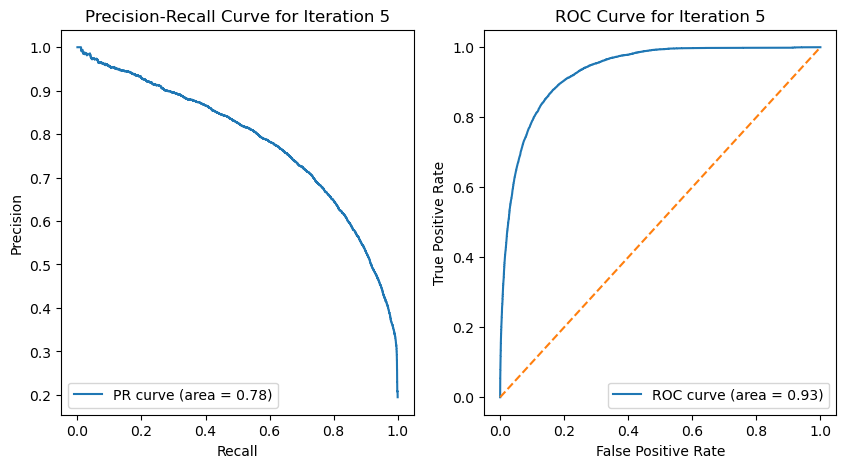

Confusion Matrix:
 [[41909  2060]
 [ 3877  6743]]
--- Iteration 6 ---
Parameters: Base Learners = ['et', 'lgbm', 'lr'], Final Estimator = RandomForestClassifier, CV = 10
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.099282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
[LightGBM] [Info] Number of positive: 22524, number of negative: 92112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.096944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can

C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

              precision    recall  f1-score   support

           0       0.91      0.94      0.93     43969
           1       0.72      0.64      0.68     10620

    accuracy                           0.88     54589
   macro avg       0.82      0.79      0.80     54589
weighted avg       0.88      0.88      0.88     54589

Confusion Matrix:
 [[41379  2590]
 [ 3844  6776]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     43969
           1       0.72      0.64      0.68     10620

    accuracy                           0.88     54589
   macro avg       0.82      0.79      0.80     54589
weighted avg       0.88      0.88      0.88     54589

Precision-Recall AUC: 0.7547978926263844
ROC AUC: 0.9207116936393168


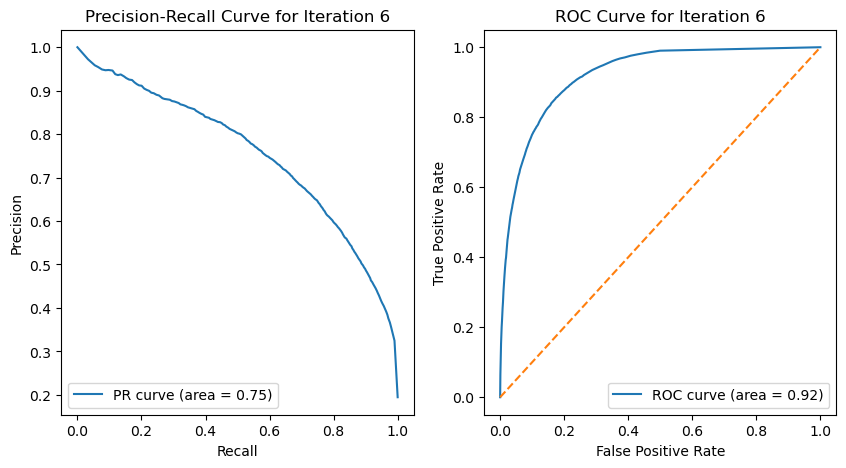

Confusion Matrix:
 [[41379  2590]
 [ 3844  6776]]
--- Iteration 7 ---
Parameters: Base Learners = ['rf', 'lr', 'gnb'], Final Estimator = RidgeClassifier, CV = 5


C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.76      0.64      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.80      0.81     54589
weighted avg       0.89      0.89      0.89     54589

Confusion Matrix:
 [[41849  2120]
 [ 3838  6782]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.76      0.64      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.80      0.81     54589
weighted avg       0.89      0.89      0.89     54589

Confusion Matrix:
 [[41849  2120]
 [ 3838  6782]]
--- Iteration 8 ---
Parameters: Base Learners = ['gb', 'ridge', 'knn'], Final Estimator = RidgeClassifier, CV = 10
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.7

C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

              precision    recall  f1-score   support

           0       0.90      0.95      0.93     43969
           1       0.73      0.59      0.65     10620

    accuracy                           0.88     54589
   macro avg       0.82      0.77      0.79     54589
weighted avg       0.87      0.88      0.87     54589

Confusion Matrix:
 [[41629  2340]
 [ 4380  6240]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     43969
           1       0.73      0.59      0.65     10620

    accuracy                           0.88     54589
   macro avg       0.82      0.77      0.79     54589
weighted avg       0.87      0.88      0.87     54589

Precision-Recall AUC: 0.7294031954074981
ROC AUC: 0.9175659295397258


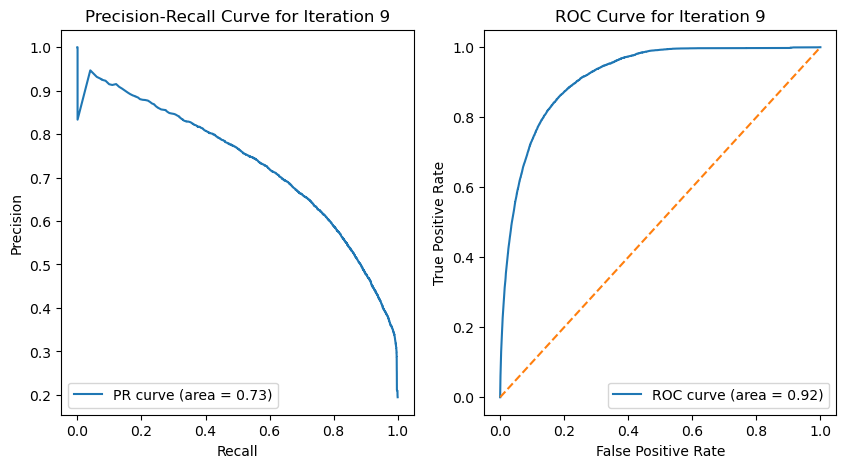

Confusion Matrix:
 [[41629  2340]
 [ 4380  6240]]
--- Iteration 10 ---
Parameters: Base Learners = ['xgb', 'lr', 'gnb'], Final Estimator = LogisticRegression, CV = 10


C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.76      0.61      0.68     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.78      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Confusion Matrix:
 [[41934  2035]
 [ 4107  6513]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.76      0.61      0.68     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.78      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Precision-Recall AUC: 0.7739427683335627
ROC AUC: 0.929778110660828


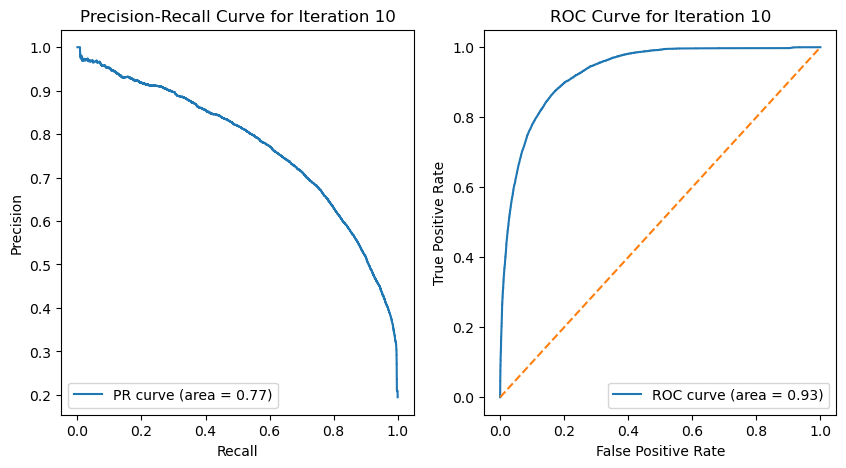

Confusion Matrix:
 [[41934  2035]
 [ 4107  6513]]


In [42]:
import random
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
import numpy as np
import itertools
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifierimport itertools
from sklearn.tree import DecisionTreeClassifier

# Base learners with varied configurations
base_learners_configurations = [
    [('rf', RandomForestClassifier(n_estimators=100)), ('lr', LogisticRegression()), ('gnb', GaussianNB())],
    [('gb', GradientBoostingClassifier(n_estimators=100)), ('ridge', RidgeClassifier()), ('knn', KNeighborsClassifier())],
    [('et', ExtraTreesClassifier(n_estimators=100)), ('lgbm', lgb.LGBMClassifier()), ('lr', LogisticRegression())],
    [('xgb', xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')), ('lr', LogisticRegression()), ('gnb', GaussianNB())],
    # Add more configurations as needed
]

# Hyperparameters for Stacking (tuning the final estimator)
final_estimator_options = [LogisticRegression(), RandomForestClassifier(n_estimators=200), RidgeClassifier()]
cv_options = [5, 10]  # Cross-validation strategy

# Create combinations
all_combinations = list(itertools.product(base_learners_configurations, final_estimator_options, cv_options))

# Select a number of combinations randomly
selected_combinations = random.sample(all_combinations, 20)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Iterate over the selected combinations
for i, (base_learners, final_estimator, cv) in enumerate(selected_combinations, 1):
    print(f"--- Iteration {i} ---")
    print(f"Parameters: Base Learners = {[bl[0] for bl in base_learners]}, Final Estimator = {type(final_estimator).__name__}, CV = {cv}")

    # Initialize and configure the Stacking model
    stacking_model = StackingClassifier(estimators=base_learners, final_estimator=final_estimator, cv=cv)

    # Train the model
    stacking_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_stack = stacking_model.predict(X_test_scaled)

    # Generate and store the classification report
    report = classification_report(y_test, y_pred_stack)
    results[f"Iteration {i}"] = report
    print(report)

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred_stack)
    print("Confusion Matrix:\n", cm)

    # Predict probabilities for the test set if possible
    if hasattr(stacking_model, "predict_proba"):
        y_probs = stacking_model.predict_proba(X_test_scaled)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_probs)
        pr_auc = auc(recall, precision)
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
    else:
        pr_auc, roc_auc = None, None

    # Generate and store the classification report and AUC scores
    y_pred_stack = stacking_model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred_stack)
    results[f"Iteration {i}"] = {"Report": report, "PR AUC": pr_auc, "ROC AUC": roc_auc}
    print(report)
    if pr_auc and roc_auc:
        print(f"Precision-Recall AUC: {pr_auc}")
        print(f"ROC AUC: {roc_auc}")

        # Plotting the curves
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve for Iteration {i}')
        plt.legend(loc="lower left")

        plt.subplot(1, 2, 2)
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for Iteration {i}')
        plt.legend(loc="lower right")
        plt.show()

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred_stack)
    print("Confusion Matrix:\n", cm)

--- Iteration 1 ---
Parameters: Base Learners = ['cat', 'gb', 'lr'], Final Estimator = RandomForestClassifier, CV = 10


C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

              precision    recall  f1-score   support

           0       0.91      0.94      0.93     43969
           1       0.72      0.63      0.67     10620

    accuracy                           0.88     54589
   macro avg       0.82      0.78      0.80     54589
weighted avg       0.88      0.88      0.88     54589

Confusion Matrix:
 [[41440  2529]
 [ 3965  6655]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     43969
           1       0.72      0.63      0.67     10620

    accuracy                           0.88     54589
   macro avg       0.82      0.78      0.80     54589
weighted avg       0.88      0.88      0.88     54589

Precision-Recall AUC: 0.7461636540769288
ROC AUC: 0.9203394905989877


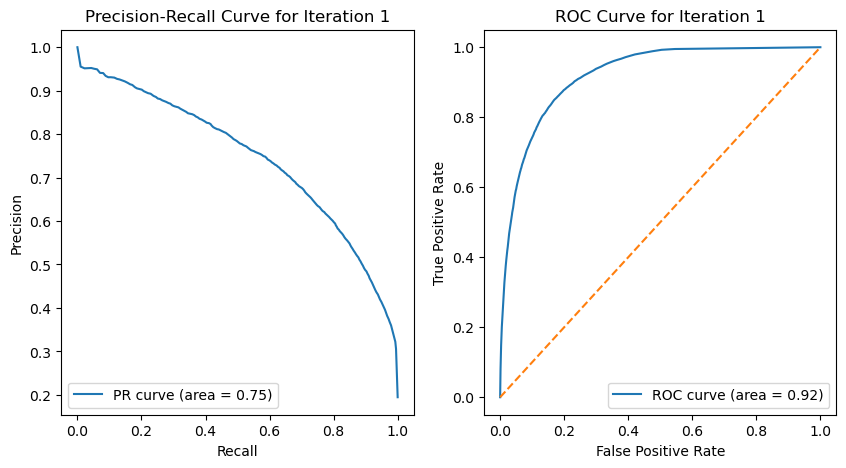

Confusion Matrix:
 [[41440  2529]
 [ 3965  6655]]
--- Iteration 2 ---
Parameters: Base Learners = ['ab', 'bag', 'lgbm'], Final Estimator = RandomForestClassifier, CV = 5
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
[LightGBM] [Info] Number of positive: 20022, number of negative: 81877
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can

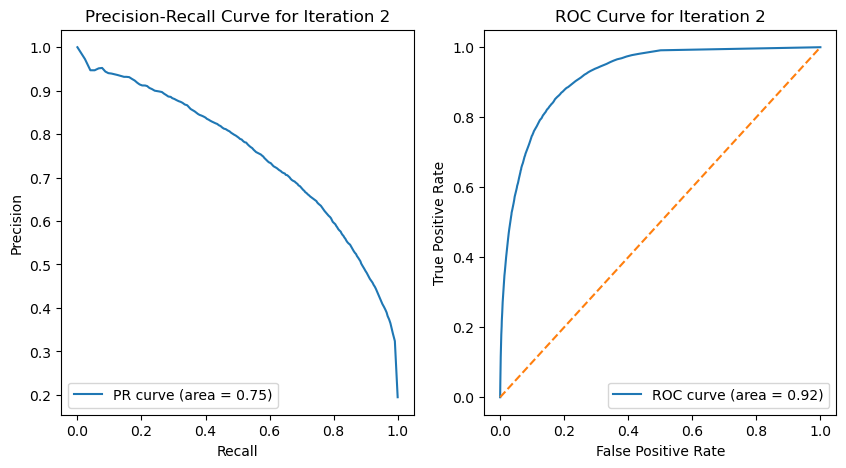

Confusion Matrix:
 [[41228  2741]
 [ 3835  6785]]
--- Iteration 3 ---
Parameters: Base Learners = ['gb', 'knn', 'ridge'], Final Estimator = RidgeClassifier, CV = 10
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.76      0.59      0.66     10620

    accuracy                           0.88     54589
   macro avg       0.83      0.77      0.80     54589
weighted avg       0.88      0.88      0.88     54589

Confusion Matrix:
 [[41972  1997]
 [ 4373  6247]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.76      0.59      0.66     10620

    accuracy                           0.88     54589
   macro avg       0.83      0.77      0.80     54589
weighted avg       0.88      0.88      0.88     54589

Confusion Matrix:
 [[41972  1997]
 [ 4373  6247]]
--- Iteration 4 ---
Parameters: Base Learners = ['cat', 'gb', 'lr'], Final Estima

C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.76      0.62      0.68     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.79      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Confusion Matrix:
 [[41867  2102]
 [ 4057  6563]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.76      0.62      0.68     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.79      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Confusion Matrix:
 [[41867  2102]
 [ 4057  6563]]
--- Iteration 5 ---
Parameters: Base Learners = ['ab', 'rf', 'knn'], Final Estimator = RidgeClassifier, CV = 10
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.76  

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.77      0.64      0.70     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.80      0.81     54589
weighted avg       0.89      0.89      0.89     54589

Precision-Recall AUC: 0.7847091498055654
ROC AUC: 0.9338398363956047


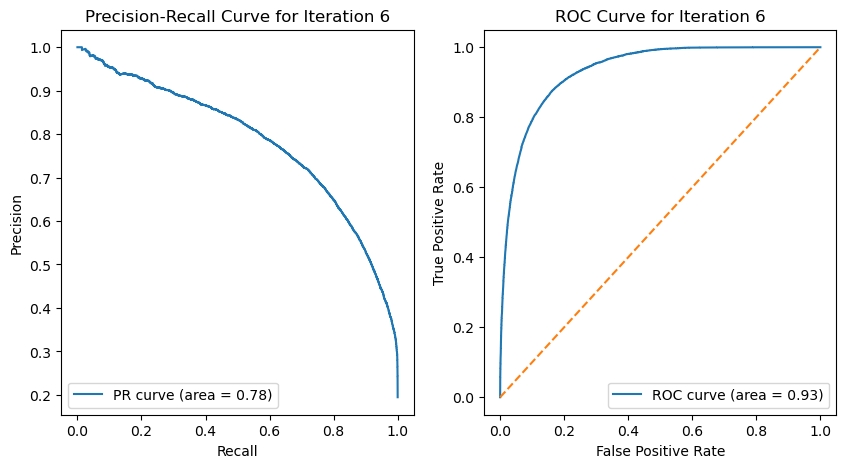

Confusion Matrix:
 [[41898  2071]
 [ 3849  6771]]
--- Iteration 7 ---
Parameters: Base Learners = ['cat', 'xgb', 'gnb'], Final Estimator = RandomForestClassifier, CV = 10
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     43969
           1       0.73      0.59      0.65     10620

    accuracy                           0.88     54589
   macro avg       0.82      0.77      0.79     54589
weighted avg       0.87      0.88      0.87     54589

Confusion Matrix:
 [[41722  2247]
 [ 4399  6221]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     43969
           1       0.73      0.59      0.65     10620

    accuracy                           0.88     54589
   macro avg       0.82      0.77      0.79     54589
weighted avg       0.87      0.88      0.87     54589

Precision-Recall AUC: 0.7409816547371437
ROC AUC: 0.9196518485310164


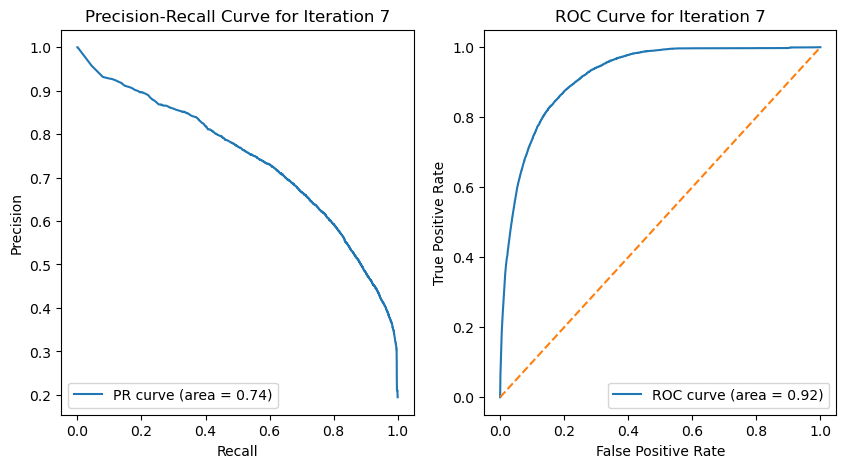

Confusion Matrix:
 [[41722  2247]
 [ 4399  6221]]
--- Iteration 8 ---
Parameters: Base Learners = ['rf', 'lgbm', 'gnb'], Final Estimator = RidgeClassifier, CV = 5
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
[LightGBM] [Info] Number of positive: 20022, number of negative: 81877
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `f

C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.76      0.63      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.79      0.81     54589
weighted avg       0.88      0.89      0.89     54589

Confusion Matrix:
 [[41900  2069]
 [ 3929  6691]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.76      0.63      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.79      0.81     54589
weighted avg       0.88      0.89      0.89     54589

Precision-Recall AUC: 0.7773396730140897
ROC AUC: 0.9308766846904079


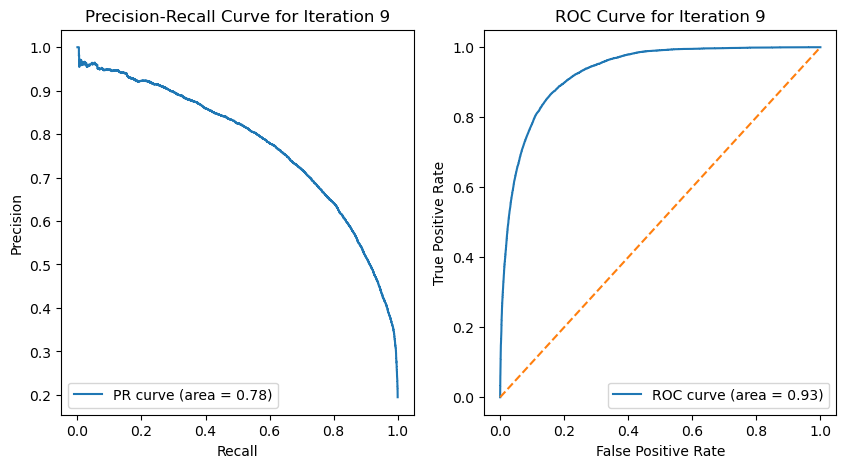

Confusion Matrix:
 [[41900  2069]
 [ 3929  6691]]
--- Iteration 10 ---
Parameters: Base Learners = ['rf', 'lgbm', 'gnb'], Final Estimator = LogisticRegression, CV = 10
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
[LightGBM] [Info] Number of positive: 22524, number of negative: 92112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can s

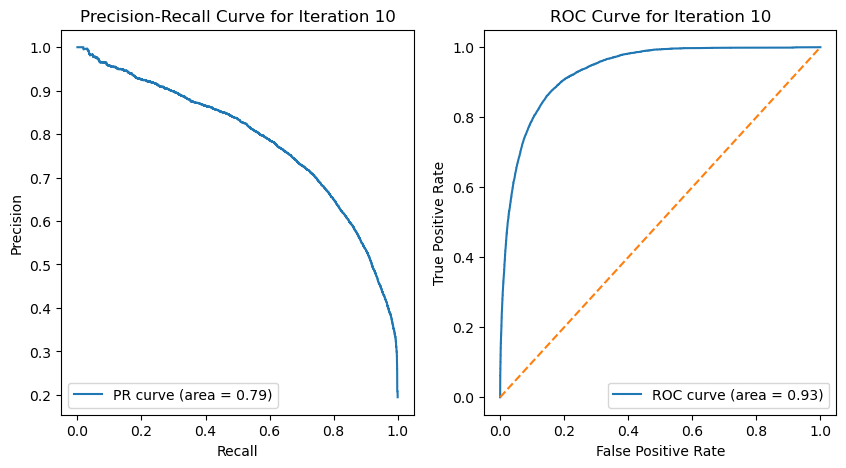

Confusion Matrix:
 [[41907  2062]
 [ 3849  6771]]


In [56]:
# Function to create a simple Keras ANN model
def create_ann_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Base learners with varied configurations
base_learners_configurations = [
    [('rf', RandomForestClassifier(n_estimators=100)), ('et', ExtraTreesClassifier(n_estimators=100)), ('lr', LogisticRegression())],
    [('gb', GradientBoostingClassifier(n_estimators=100)), ('knn', KNeighborsClassifier()), ('ridge', RidgeClassifier())],
    [('cat', CatBoostClassifier(iterations=100, silent=True)), ('xgb', xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')), ('gnb', GaussianNB())],
    [('ab', AdaBoostClassifier(n_estimators=100)), ('bag', BaggingClassifier(n_estimators=100)), ('lgbm', lgb.LGBMClassifier())],
    [('rf', RandomForestClassifier(n_estimators=100)), ('lgbm', lgb.LGBMClassifier()), ('gnb', GaussianNB())],
    [('cat', CatBoostClassifier(iterations=100, silent=True)), ('gb', GradientBoostingClassifier(n_estimators=100)), ('lr', LogisticRegression())],
    [('xgb', xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')), ('et', ExtraTreesClassifier(n_estimators=100)), ('ridge', RidgeClassifier())],
    [('ab', AdaBoostClassifier(n_estimators=100)), ('rf', RandomForestClassifier(n_estimators=100)), ('knn', KNeighborsClassifier())],
    [('bag', BaggingClassifier(n_estimators=100)), ('lr', LogisticRegression()), ('ridge', RidgeClassifier())],
    [('lgbm', lgb.LGBMClassifier()), ('gnb', GaussianNB()), ('et', ExtraTreesClassifier(n_estimators=100))]
    # Add more configurations as needed
]


# Hyperparameters for Stacking (tuning the final estimator)
final_estimator_options = [LogisticRegression(), RandomForestClassifier(n_estimators=200), RidgeClassifier()]
cv_options = [5, 10]  # Cross-validation strategy

# Create combinations
all_combinations = list(itertools.product(base_learners_configurations, final_estimator_options, cv_options))

# Select a number of combinations randomly
selected_combinations = random.sample(all_combinations, 20)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# Iterate over the selected combinations
for i, (base_learners, final_estimator, cv) in enumerate(selected_combinations, 1):
    print(f"--- Iteration {i} ---")
    print(f"Parameters: Base Learners = {[bl[0] for bl in base_learners]}, Final Estimator = {type(final_estimator).__name__}, CV = {cv}")

    # Initialize and configure the Stacking model
    stacking_model = StackingClassifier(estimators=base_learners, final_estimator=final_estimator, cv=cv)

    # Train the model
    stacking_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_stack = stacking_model.predict(X_test_scaled)

    # Generate and store the classification report
    report = classification_report(y_test, y_pred_stack)
    results[f"Iteration {i}"] = report
    print(report)

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred_stack)
    print("Confusion Matrix:\n", cm)

    # Predict probabilities for the test set if possible
    if hasattr(stacking_model, "predict_proba"):
        y_probs = stacking_model.predict_proba(X_test_scaled)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_probs)
        pr_auc = auc(recall, precision)
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
    else:
        pr_auc, roc_auc = None, None

    # Generate and store the classification report and AUC scores
    y_pred_stack = stacking_model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred_stack)
    results[f"Iteration {i}"] = {"Report": report, "PR AUC": pr_auc, "ROC AUC": roc_auc}
    print(report)
    if pr_auc and roc_auc:
        print(f"Precision-Recall AUC: {pr_auc}")
        print(f"ROC AUC: {roc_auc}")

        # Plotting the curves
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve for Iteration {i}')
        plt.legend(loc="lower left")

        plt.subplot(1, 2, 2)
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for Iteration {i}')
        plt.legend(loc="lower right")
        plt.show()

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred_stack)
    print("Confusion Matrix:\n", cm)

# 'results' now contains the classification report, PR AUC, and ROC AUC for each iteration


--- Iteration 1 ---
Parameters: Base Learners = ['xgb', 'gb', 'et'], Final Estimator = LogisticRegression, CV = 10
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.77      0.64      0.70     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.80      0.82     54589
weighted avg       0.89      0.89      0.89     54589

Confusion Matrix:
 [[41941  2028]
 [ 3832  6788]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.77      0.64      0.70     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.80      0.82     54589
weighted avg       0.89      0.89      0.89     54589

Precision-Recall AUC: 0.7866435495273623
ROC AUC: 0.9351900172433592


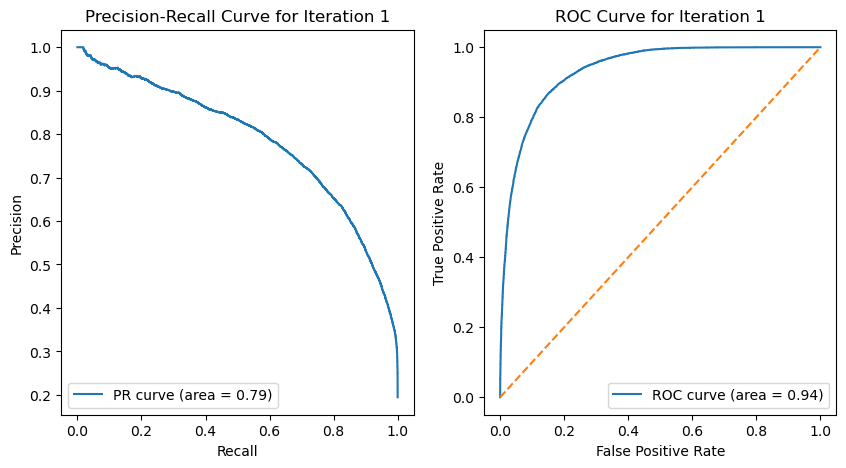

Confusion Matrix:
 [[41941  2028]
 [ 3832  6788]]
--- Iteration 2 ---
Parameters: Base Learners = ['rf', 'lgbm', 'gnb'], Final Estimator = RidgeClassifier, CV = 10
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 22524, number of negative: 92112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4902
[LightGBM] [Info] Number of data points in the train set: 114636, number of used features: 121
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196483 -> initscore=-1.408424
[LightGBM] [Info] Start training from score -1.408424
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Info] Number of positive: 22525, number of negative: 92112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4905
[LightGBM] [Info] Number of data points in the train set: 114637, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196490 -> initscore=-1.408379
[LightGBM] [Info] Start training from score -1.408379
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 22524, number of negative: 92113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 22524, number of negative: 92113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018527 seconds.


C:\Users\IM\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[LightGBM] [Info] Number of positive: 22524, number of negative: 92112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4903
[LightGBM] [Info] Number of data points in the train set: 114636, number of used features: 121
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196483 -> initscore=-1.408424
[LightGBM] [Info] Start training from score -1.408424
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 22524, number of negative: 92112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 22524, number of negative: 92113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4899
[LightGBM] [Info] Number of data points in the train set: 114637, number of used features: 121
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196481 -> initscore=-1.408435
[LightGBM] [Info] Start training from score -1.408435
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\IM\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\en

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     43969
           1       0.73      0.65      0.68     10620

    accuracy                           0.88     54589
   macro avg       0.82      0.79      0.81     54589
weighted avg       0.88      0.88      0.88     54589

Confusion Matrix:
 [[41411  2558]
 [ 3756  6864]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     43969
           1       0.73      0.65      0.68     10620

    accuracy                           0.88     54589
   macro avg       0.82      0.79      0.81     54589
weighted avg       0.88      0.88      0.88     54589

Precision-Recall AUC: 0.7583078229156321
ROC AUC: 0.9242524908085601


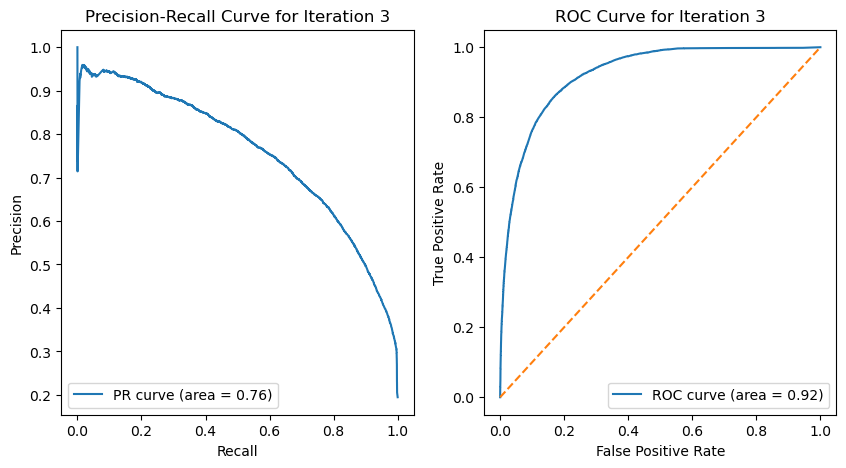

Confusion Matrix:
 [[41411  2558]
 [ 3756  6864]]
--- Iteration 4 ---
Parameters: Base Learners = ['rf', 'lgbm', 'gnb'], Final Estimator = RandomForestClassifier, CV = 10
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 22524, number of negative: 92112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4902
[LightGBM] [Info] Number of data points in the train set: 114636, number of used features: 121
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196483 -> initscore=-1.408424
[LightGBM] [Info] Start training from score -1.408424
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Info] Number of positive: 22525, number of negative: 92112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4905
[LightGBM] [Info] Number of data points in the train set: 114637, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196490 -> initscore=-1.408379
[LightGBM] [Info] Start training from score -1.408379
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 22524, number of negative: 92113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4903
[LightGBM] [Info] Number of data points in the train set: 114637, number of used features: 121
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196481 -> initscore=-1.408435
[LightGBM] [Info] Start training from score -1.408435
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 22524, number of negative: 92113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4899
[LightGBM] [Info] Number of data points in the train set: 114637, number of used features: 121
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196481 -> initscore=-1.408435
[LightGBM] [Info] Start training from score -1.408435
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

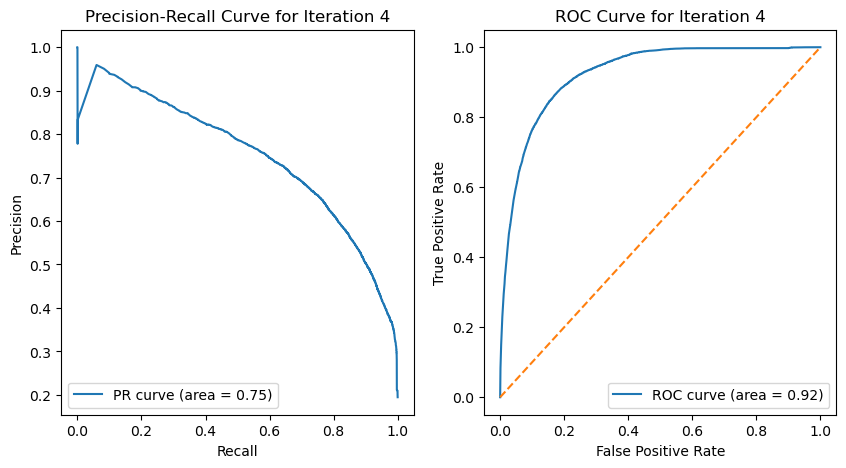

Confusion Matrix:
 [[41776  2193]
 [ 4228  6392]]
--- Iteration 5 ---
Parameters: Base Learners = ['rf', 'lgbm', 'gnb'], Final Estimator = RandomForestClassifier, CV = 5
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 20022, number of negative: 81877
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4896
[LightGBM] [Info] Number of data points in the train set: 101899, number of used features: 120
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196489 -> initscore=-1.408386
[LightGBM] [Info] Start training from score -1.408386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

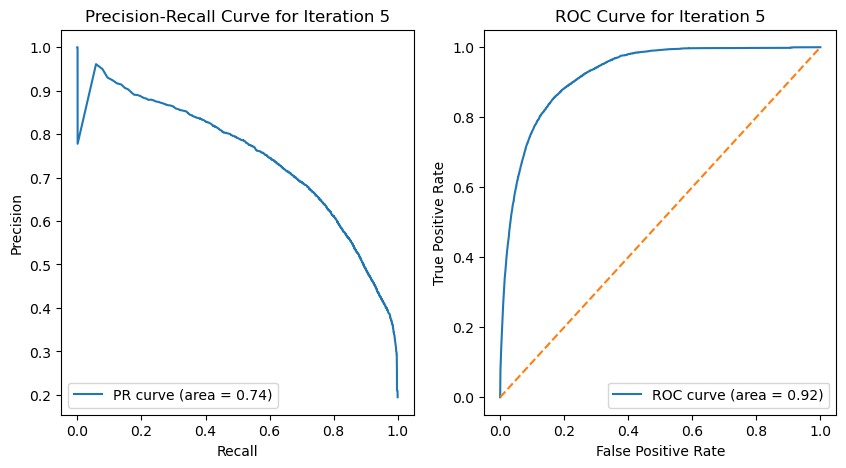

Confusion Matrix:
 [[41689  2280]
 [ 4130  6490]]
--- Iteration 6 ---
Parameters: Base Learners = ['xgb', 'gb', 'et'], Final Estimator = RidgeClassifier, CV = 10
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.76      0.65      0.70     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.80      0.82     54589
weighted avg       0.89      0.89      0.89     54589

Confusion Matrix:
 [[41823  2146]
 [ 3727  6893]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.76      0.65      0.70     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.80      0.82     54589
weighted avg       0.89      0.89      0.89     54589

Confusion Matrix:
 [[41823  2146]
 [ 3727  6893]]
--- Iteration 7 ---
Parameters: Base Learners = ['lgbm', 'nb', 'ada'], Final Estimat

C:\Users\IM\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[LightGBM] [Info] Number of positive: 22524, number of negative: 92112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4903
[LightGBM] [Info] Number of data points in the train set: 114636, number of used features: 121
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196483 -> initscore=-1.408424
[LightGBM] [Info] Start training from score -1.408424
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 22524, number of negative: 92112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 22524, number of negative: 92113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4899
[LightGBM] [Info] Number of data points in the train set: 114637, number of used features: 121
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196481 -> initscore=-1.408435
[LightGBM] [Info] Start training from score -1.408435
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\IM\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\IM\anaconda3\Lib\site-packages\sklearn\en

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.75      0.63      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.79      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Confusion Matrix:
 [[41786  2183]
 [ 3905  6715]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.75      0.63      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.79      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Precision-Recall AUC: 0.7744797570001685
ROC AUC: 0.9297382692025913


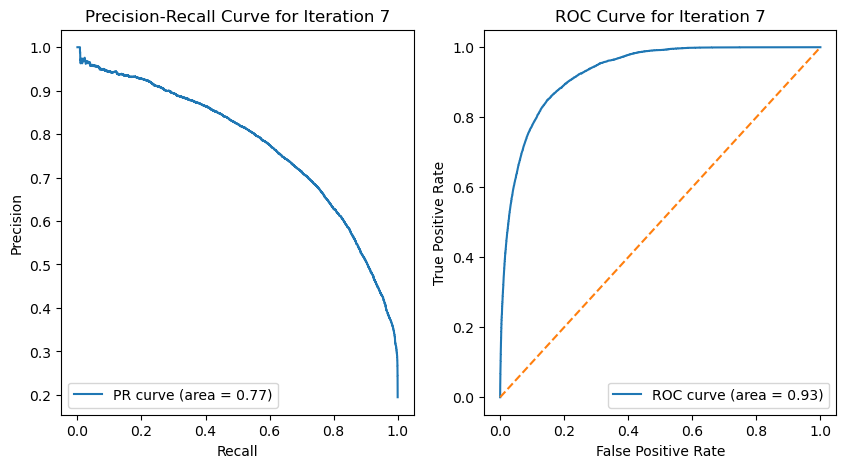

Confusion Matrix:
 [[41786  2183]
 [ 3905  6715]]
--- Iteration 8 ---
Parameters: Base Learners = ['xgb', 'gb', 'et'], Final Estimator = LogisticRegression, CV = 5
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.77      0.64      0.70     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.80      0.82     54589
weighted avg       0.89      0.89      0.89     54589

Confusion Matrix:
 [[41941  2028]
 [ 3844  6776]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.77      0.64      0.70     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.80      0.82     54589
weighted avg       0.89      0.89      0.89     54589

Precision-Recall AUC: 0.7865705766040483
ROC AUC: 0.9350693214389747


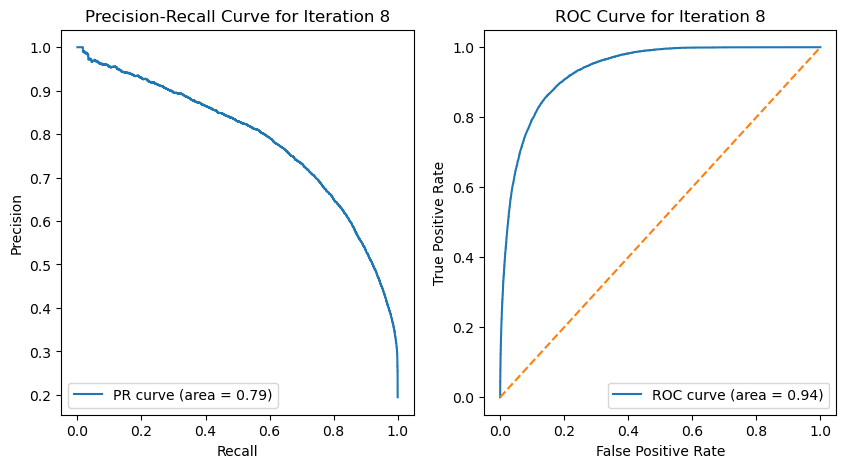

Confusion Matrix:
 [[41941  2028]
 [ 3844  6776]]
--- Iteration 9 ---
Parameters: Base Learners = ['xgb', 'gb', 'et'], Final Estimator = RandomForestClassifier, CV = 5
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     43969
           1       0.72      0.64      0.68     10620

    accuracy                           0.88     54589
   macro avg       0.82      0.79      0.80     54589
weighted avg       0.88      0.88      0.88     54589

Confusion Matrix:
 [[41319  2650]
 [ 3788  6832]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     43969
           1       0.72      0.64      0.68     10620

    accuracy                           0.88     54589
   macro avg       0.82      0.79      0.80     54589
weighted avg       0.88      0.88      0.88     54589

Precision-Recall AUC: 0.7529767372266504
ROC AUC: 0.921598684340992


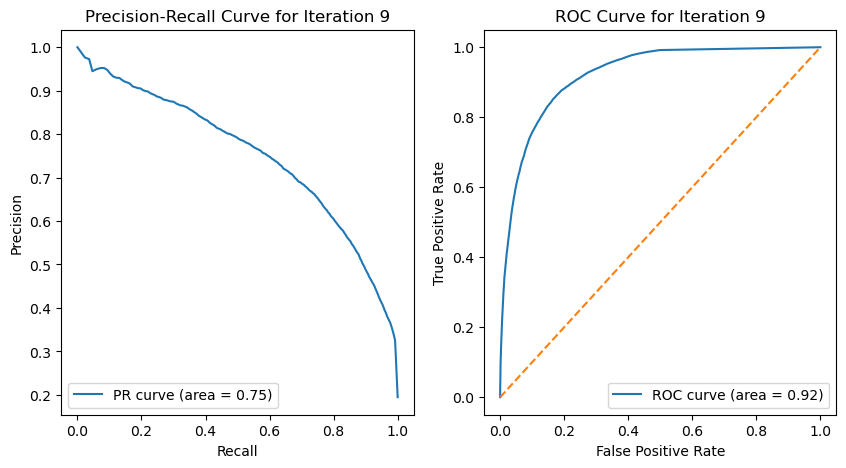

Confusion Matrix:
 [[41319  2650]
 [ 3788  6832]]
--- Iteration 10 ---
Parameters: Base Learners = ['rf', 'lgbm', 'gnb'], Final Estimator = LogisticRegression, CV = 5
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Info] Number of positive: 20022, number of negative: 81877
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4896
[LightGBM] [Info] Number of data points in the train set: 101899, number of used features: 120
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196489 -> initscore=-1.408386
[LightGBM] [Info] Start training from score -1.408386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 20021, number of negative: 81878
[LightGBM] [Info] Auto-choosi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

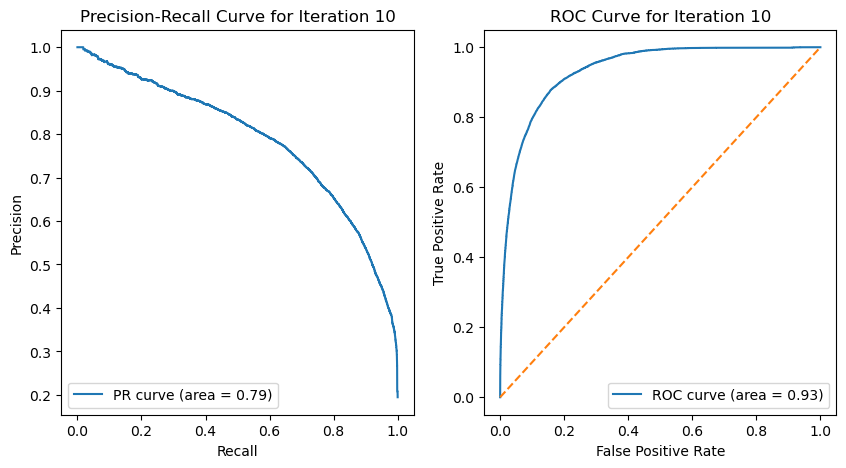

Confusion Matrix:
 [[41930  2039]
 [ 3741  6879]]


In [73]:
#Stacking with best performing models

# Base learners with varied configurations using best-performing models
base_learners_configurations = [
    [('lgbm', lgb.LGBMClassifier(n_estimators=250, learning_rate=0.0575, max_depth=9, num_leaves=70)),
     ('nb', GaussianNB(var_smoothing=0.1)),
     ('ada', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=150, learning_rate=0.01))],
    [('xgb', xgb.XGBClassifier(n_estimators=800, learning_rate=0.15, max_depth=5, subsample=0.5, colsample_bytree=0.125, gamma=0.1, min_child_weight=7, reg_alpha=0.2, reg_lambda=0.15)),
     ('gb', GradientBoostingClassifier(n_estimators=900, learning_rate=0.07333333333333333, max_depth=8, min_samples_split=10, min_samples_leaf=5)),
     ('et', ExtraTreesClassifier(n_estimators=100))],
    [('rf', RandomForestClassifier(n_estimators=200, max_depth=60, min_samples_split=4, min_samples_leaf=1)),
     ('lgbm', lgb.LGBMClassifier(n_estimators=150, learning_rate=0.105, max_depth=8, num_leaves=100)),
     ('gnb', GaussianNB())],
    # Add more configurations as needed
]

# Hyperparameters for Stacking (tuning the final estimator)
final_estimator_options = [LogisticRegression(), RandomForestClassifier(n_estimators=200), RidgeClassifier()]
cv_options = [5, 10]  # Cross-validation strategy

# Create combinations
all_combinations = list(itertools.product(base_learners_configurations, final_estimator_options, cv_options))

# Select a number of combinations randomly
selected_combinations = random.sample(all_combinations, 20)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# Iterate over the selected combinations
for i, (base_learners, final_estimator, cv) in enumerate(selected_combinations, 1):
    print(f"--- Iteration {i} ---")
    print(f"Parameters: Base Learners = {[bl[0] for bl in base_learners]}, Final Estimator = {type(final_estimator).__name__}, CV = {cv}")

    # Initialize and configure the Stacking model
    stacking_model = StackingClassifier(estimators=base_learners, final_estimator=final_estimator, cv=cv)

    # Train the model
    stacking_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_stack = stacking_model.predict(X_test_scaled)

    # Generate and store the classification report
    report = classification_report(y_test, y_pred_stack)
    results[f"Iteration {i}"] = report
    print(report)

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred_stack)
    print("Confusion Matrix:\n", cm)

    # Predict probabilities for the test set if possible
    if hasattr(stacking_model, "predict_proba"):
        y_probs = stacking_model.predict_proba(X_test_scaled)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_probs)
        pr_auc = auc(recall, precision)
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
    else:
        pr_auc, roc_auc = None, None

    # Generate and store the classification report and AUC scores
    report = classification_report(y_test, y_pred_stack)
    results[f"Iteration {i}"] = {"Report": report, "PR AUC": pr_auc, "ROC AUC": roc_auc}
    print(report)
    if pr_auc and roc_auc:
        print(f"Precision-Recall AUC: {pr_auc}")
        print(f"ROC AUC: {roc_auc}")

        # Plotting the curves
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve for Iteration {i}')
        plt.legend(loc="lower left")

        plt.subplot(1, 2, 2)
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for Iteration {i}')
        plt.legend(loc="lower right")
        plt.show()

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred_stack)
    print("Confusion Matrix:\n", cm)

# 'results' now contains the classification report, PR AUC, and ROC AUC for each iteration


In [ ]:
#Best from stacking:
#Parameters: Base Learners = ['rf', 'lgbm', 'gnb'], Final Estimator = RidgeClassifier, CV = 10
#
#              precision    recall  f1-score   support
#
#           0       0.92      0.95      0.94     43969
#           1       0.77      0.65      0.70     10620
#
#    accuracy                           0.89     54589
#   macro avg       0.84      0.80      0.82     54589
#weighted avg       0.89      0.89      0.89     54589
#
#Confusion Matrix:
# [[41856  2113]
# [ 3696  6924]]

In [ ]:
#Gaussian Naive Bayes (GNB)

In [ ]:
import numpy as np
import itertools
import random
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import cross_val_score

# Var_smoothing values to explore
var_smoothing_options = np.logspace(-10, -1, num=20)

# Different scalers to try
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]

# Create combinations of var_smoothing and scalers
all_combinations = list(itertools.product(var_smoothing_options, scalers))

# Select a number of combinations randomly
selected_combinations = random.sample(all_combinations, 20)

# Dictionary to store results
results = {}

# Iterate over the selected combinations
for i, (var_smoothing, scaler) in enumerate(selected_combinations, 1):
    print(f"--- Iteration {i} ---")
    print(f"Parameters: var_smoothing={var_smoothing}, Scaler={scaler.__class__.__name__}")

    # Scale the features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize and configure the Gaussian Naive Bayes model
    gnb_model = GaussianNB(var_smoothing=var_smoothing)
    
    # Train the model
    gnb_model.fit(X_train_scaled, y_train)

    # Cross-validation
    cv_scores = cross_val_score(gnb_model, X_train_scaled, y_train, cv=5)

    # Make predictions
    y_pred_gnb = gnb_model.predict(X_test_scaled)

    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred_gnb)
    f1 = f1_score(y_test, y_pred_gnb)
    precision = precision_score(y_test, y_pred_gnb)
    recall = recall_score(y_test, y_pred_gnb)

    # Generate and store the classification report and additional metrics
    report = classification_report(y_test, y_pred_gnb)
    results[f"Iteration {i}"] = {
        "Report": report,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall,
        "CV Score": np.mean(cv_scores)
    }
    print(report)

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred_gnb)
    print("Confusion Matrix:\n", cm)

# 'results' now contains the classification report and additional metrics for each iteration


In [57]:
import numpy as np
import itertools
import random
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Var_smoothing values to explore
var_smoothing_options = np.logspace(-9, 0, num=10)

# Create combinations (in this case, only var_smoothing will vary)
all_combinations = list(var_smoothing_options)

# Select a number of combinations randomly
selected_combinations = random.sample(all_combinations, 20)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# Iterate over the selected combinations
for i, var_smoothing in enumerate(selected_combinations, 1):
    print(f"--- Iteration {i} ---")
    print(f"Parameters: var_smoothing={var_smoothing}")

    # Initialize and configure the Gaussian Naive Bayes model
    gnb_model = GaussianNB(var_smoothing=var_smoothing)
    
    # Train the model
    gnb_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_gnb = gnb_model.predict(X_test_scaled)

    # Generate and store the classification report
    report = classification_report(y_test, y_pred_gnb)
    results[f"Iteration {i}"] = report
    print(report)

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred_gnb)
    print("Confusion Matrix:\n", cm)

# 'results' now contains the classification report for each iteration


--- Iteration 1 ---
Parameters: var_smoothing=1.0
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     43969
           1       0.55      0.64      0.59     10620

    accuracy                           0.83     54589
   macro avg       0.73      0.76      0.74     54589
weighted avg       0.84      0.83      0.83     54589

Confusion Matrix:
 [[38448  5521]
 [ 3858  6762]]
--- Iteration 2 ---
Parameters: var_smoothing=1e-06
              precision    recall  f1-score   support

           0       0.98      0.21      0.35     43969
           1       0.23      0.98      0.38     10620

    accuracy                           0.36     54589
   macro avg       0.61      0.60      0.36     54589
weighted avg       0.84      0.36      0.35     54589

Confusion Matrix:
 [[ 9363 34606]
 [  175 10445]]
--- Iteration 3 ---
Parameters: var_smoothing=1e-09
              precision    recall  f1-score   support

           0       0.97      0.10    

In [ ]:
#K-Nearest Neighbors

--- Iteration 1 ---
Parameters: n_neighbors=4, weights=uniform, algorithm=ball_tree
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     43969
           1       0.72      0.45      0.55     10620

    accuracy                           0.86     54589
   macro avg       0.80      0.70      0.73     54589
weighted avg       0.85      0.86      0.85     54589



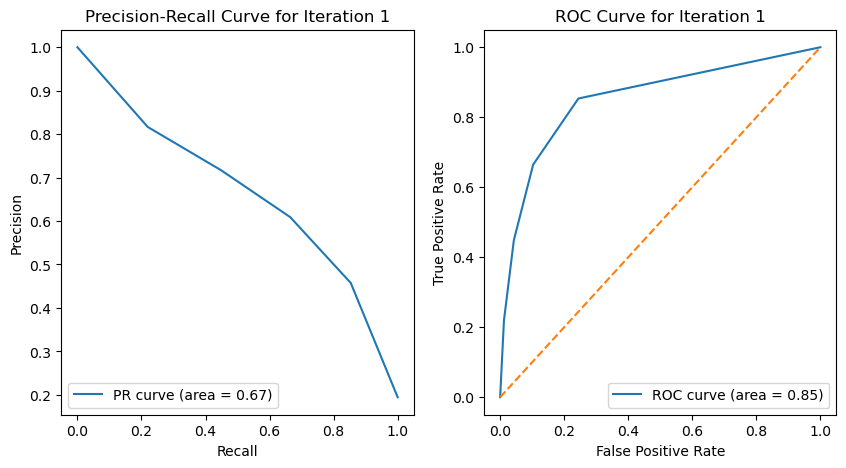

Confusion Matrix:
 [[42085  1884]
 [ 5852  4768]]
--- Iteration 2 ---
Parameters: n_neighbors=7, weights=distance, algorithm=ball_tree
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     43969
           1       0.69      0.56      0.62     10620

    accuracy                           0.87     54589
   macro avg       0.80      0.75      0.77     54589
weighted avg       0.86      0.87      0.86     54589



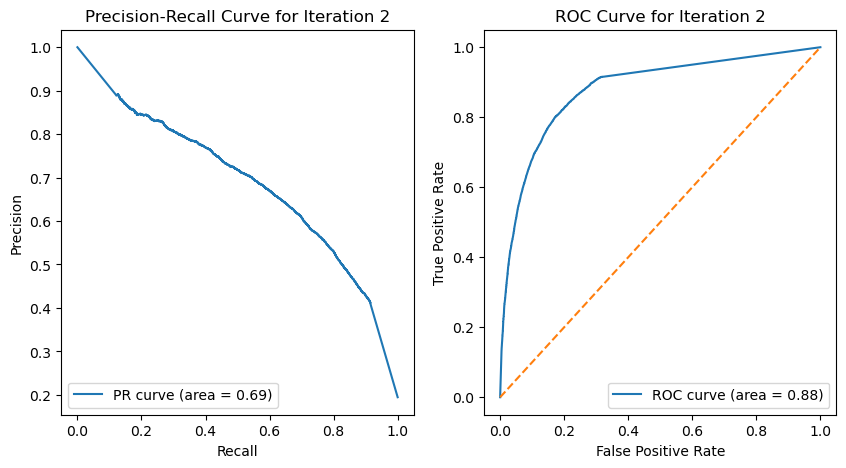

Confusion Matrix:
 [[41325  2644]
 [ 4682  5938]]
--- Iteration 3 ---
Parameters: n_neighbors=3, weights=uniform, algorithm=kd_tree
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     43969
           1       0.65      0.56      0.60     10620

    accuracy                           0.86     54589
   macro avg       0.77      0.74      0.76     54589
weighted avg       0.85      0.86      0.85     54589



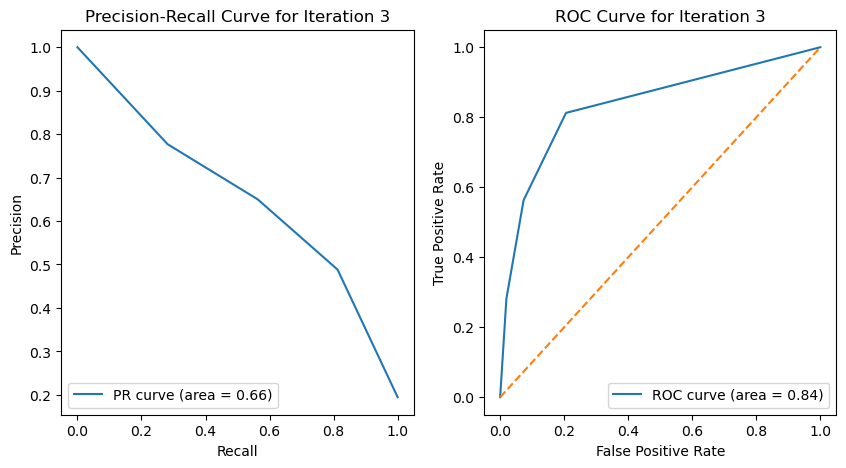

Confusion Matrix:
 [[40748  3221]
 [ 4641  5979]]
--- Iteration 4 ---
Parameters: n_neighbors=3, weights=uniform, algorithm=auto
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     43969
           1       0.65      0.56      0.60     10620

    accuracy                           0.86     54589
   macro avg       0.77      0.74      0.76     54589
weighted avg       0.85      0.86      0.85     54589



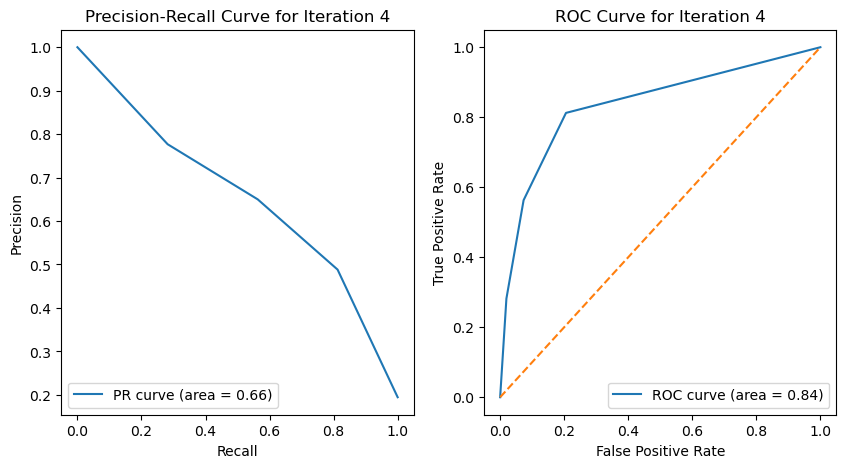

Confusion Matrix:
 [[40748  3221]
 [ 4641  5979]]
--- Iteration 5 ---
Parameters: n_neighbors=10, weights=uniform, algorithm=kd_tree


KeyboardInterrupt: 

In [62]:
import numpy as np
import itertools
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Hyperparameters to explore for KNN
n_neighbors_options = range(3, 11)  # Testing different numbers of neighbors
weights_options = ['uniform', 'distance']  # Either all neighbors weighted equally or by distance
algorithm_options = ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithms used for nearest neighbors computation

# Create combinations
all_combinations = list(itertools.product(n_neighbors_options, weights_options, algorithm_options))

# Select a number of combinations randomly
selected_combinations = random.sample(all_combinations, 20)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# Iterate over the selected combinations
for i, (n_neighbors, weights, algorithm) in enumerate(selected_combinations, 1):
    print(f"--- Iteration {i} ---")
    print(f"Parameters: n_neighbors={n_neighbors}, weights={weights}, algorithm={algorithm}")

    # Initialize and configure the KNN model
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm)
    
    # Train the model
    knn_model.fit(X_train_scaled, y_train)

    # Predict probabilities for the test set (if supported)
    if hasattr(knn_model, "predict_proba"):
        y_probs = knn_model.predict_proba(X_test_scaled)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_probs)
        pr_auc = auc(recall, precision)
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
    else:
        pr_auc, roc_auc = None, None

    # Make predictions
    y_pred_knn = knn_model.predict(X_test_scaled)

    # Generate and store the classification report and AUC scores
    report = classification_report(y_test, y_pred_knn)
    results[f"Iteration {i}"] = {"Report": report, "PR AUC": pr_auc, "ROC AUC": roc_auc}
    print(report)

    if pr_auc and roc_auc:
        # Plot the Precision-Recall curve
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve for Iteration {i}')
        plt.legend(loc="lower left")

        # Plot the ROC curve
        plt.subplot(1, 2, 2)
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for Iteration {i}')
        plt.legend(loc="lower right")
        plt.show()

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred_knn)
    print("Confusion Matrix:\n", cm)

# 'results' now contains the classification report, PR AUC, and ROC AUC for each iteration


In [ ]:
#Naives Bayes

--- Iteration 1 ---
Parameters: alpha=0.2
              precision    recall  f1-score   support

           0       0.92      0.84      0.87     43969
           1       0.50      0.69      0.58     10620

    accuracy                           0.81     54589
   macro avg       0.71      0.76      0.73     54589
weighted avg       0.84      0.81      0.82     54589



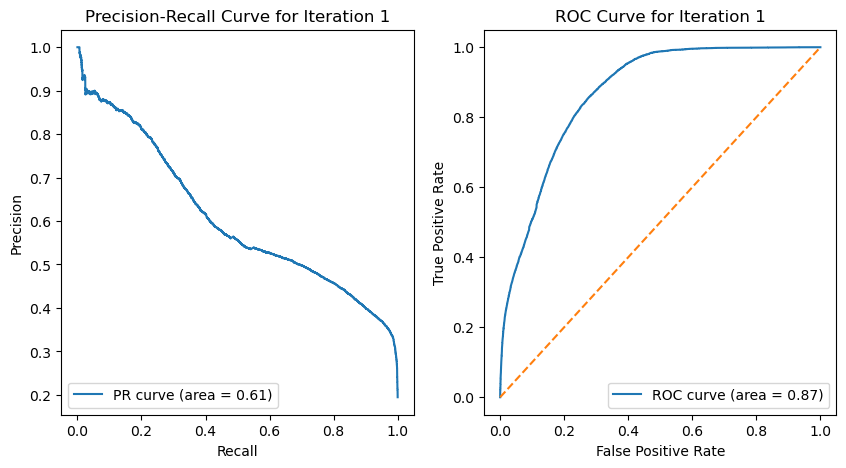

Confusion Matrix:
 [[36730  7239]
 [ 3332  7288]]
--- Iteration 2 ---
Parameters: var_smoothing=1.0
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     43969
           1       0.55      0.64      0.59     10620

    accuracy                           0.83     54589
   macro avg       0.73      0.76      0.74     54589
weighted avg       0.84      0.83      0.83     54589



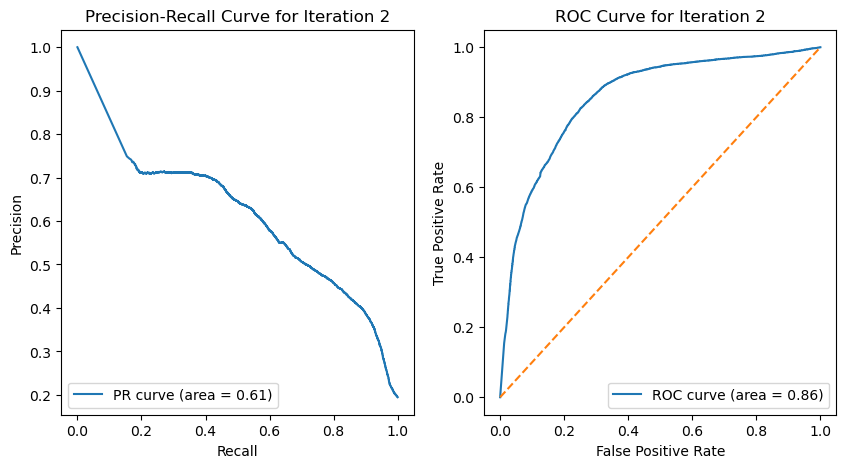

Confusion Matrix:
 [[38448  5521]
 [ 3858  6762]]
--- Iteration 3 ---
Parameters: alpha=0.7000000000000001
              precision    recall  f1-score   support

           0       0.92      0.84      0.87     43969
           1       0.50      0.69      0.58     10620

    accuracy                           0.81     54589
   macro avg       0.71      0.76      0.73     54589
weighted avg       0.84      0.81      0.82     54589



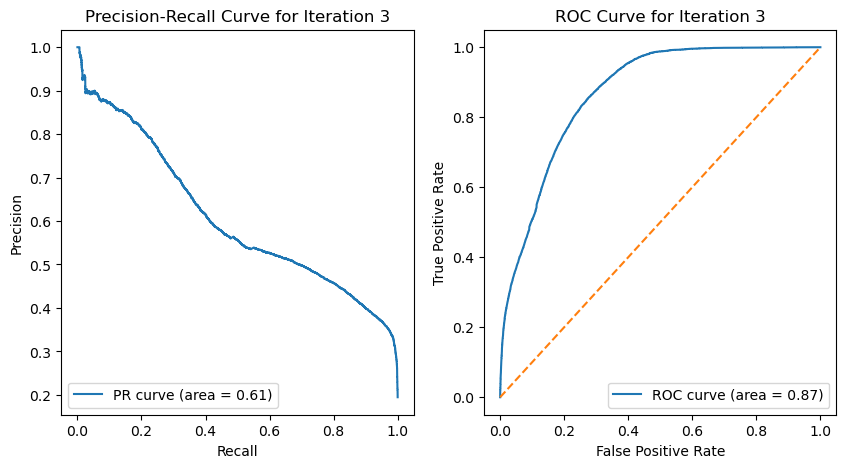

Confusion Matrix:
 [[36729  7240]
 [ 3332  7288]]
--- Iteration 4 ---
Parameters: alpha=0.9
              precision    recall  f1-score   support

           0       0.92      0.84      0.87     43969
           1       0.50      0.69      0.58     10620

    accuracy                           0.81     54589
   macro avg       0.71      0.76      0.73     54589
weighted avg       0.84      0.81      0.82     54589



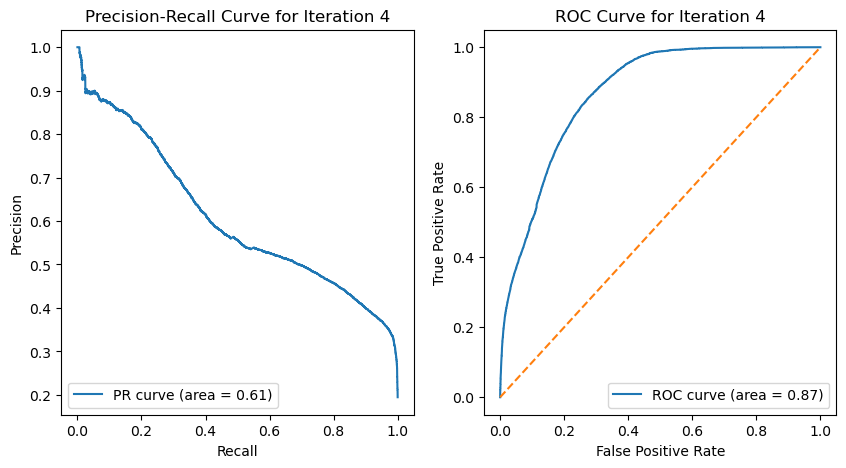

Confusion Matrix:
 [[36730  7239]
 [ 3331  7289]]
--- Iteration 5 ---
Parameters: alpha=0.8
              precision    recall  f1-score   support

           0       0.92      0.84      0.87     43969
           1       0.50      0.69      0.58     10620

    accuracy                           0.81     54589
   macro avg       0.71      0.76      0.73     54589
weighted avg       0.84      0.81      0.82     54589



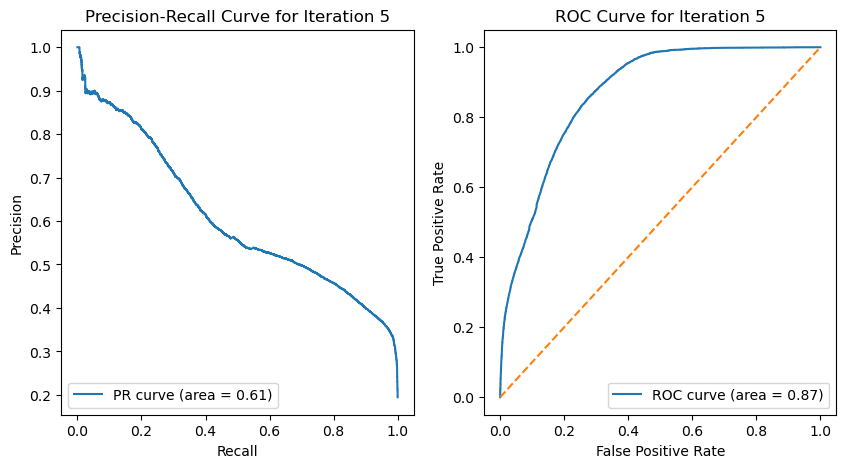

Confusion Matrix:
 [[36731  7238]
 [ 3331  7289]]
--- Iteration 6 ---
Parameters: var_smoothing=0.1
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     43969
           1       0.39      0.90      0.55     10620

    accuracy                           0.71     54589
   macro avg       0.68      0.78      0.67     54589
weighted avg       0.85      0.71      0.74     54589



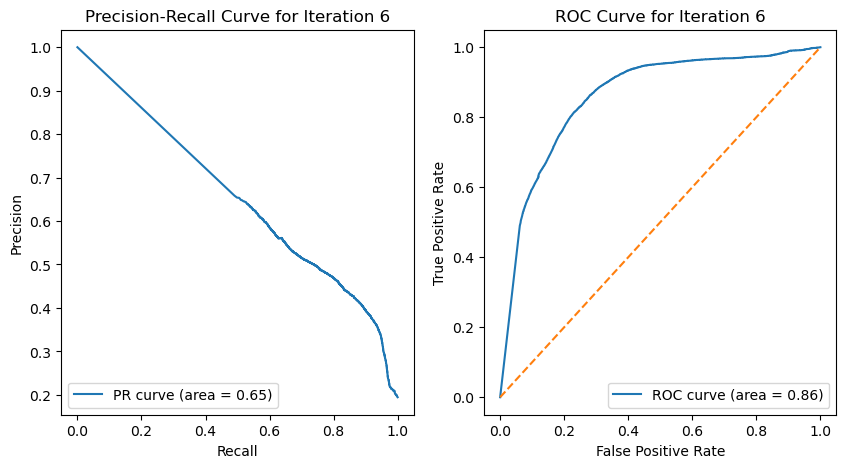

Confusion Matrix:
 [[29103 14866]
 [ 1039  9581]]
--- Iteration 7 ---
Parameters: alpha=0.6
              precision    recall  f1-score   support

           0       0.92      0.84      0.87     43969
           1       0.50      0.69      0.58     10620

    accuracy                           0.81     54589
   macro avg       0.71      0.76      0.73     54589
weighted avg       0.84      0.81      0.82     54589



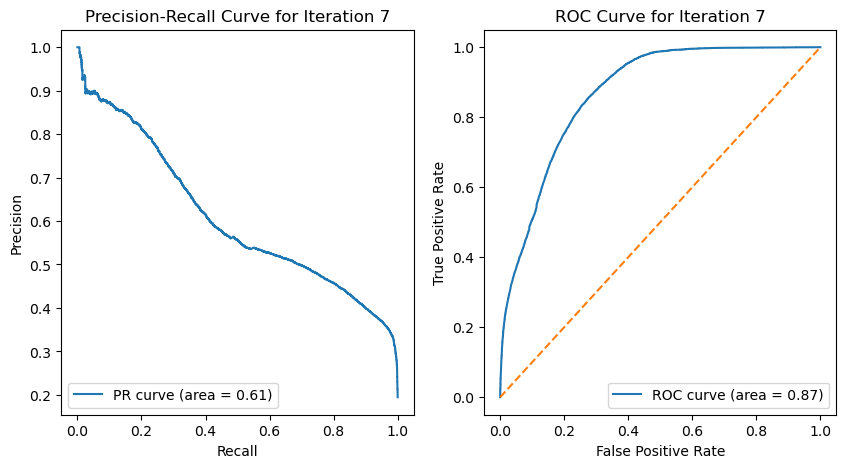

Confusion Matrix:
 [[36729  7240]
 [ 3332  7288]]
--- Iteration 8 ---
Parameters: alpha=0.4
              precision    recall  f1-score   support

           0       0.92      0.84      0.87     43969
           1       0.50      0.69      0.58     10620

    accuracy                           0.81     54589
   macro avg       0.71      0.76      0.73     54589
weighted avg       0.84      0.81      0.82     54589



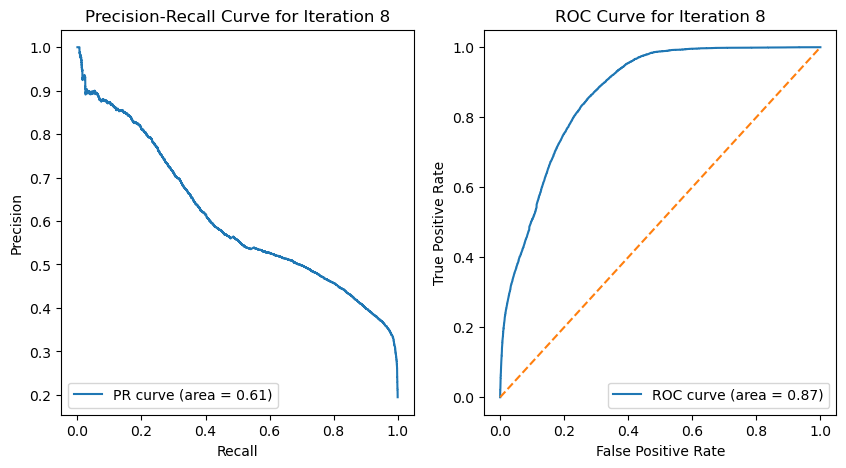

Confusion Matrix:
 [[36730  7239]
 [ 3332  7288]]
--- Iteration 9 ---
Parameters: var_smoothing=0.1
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     43969
           1       0.39      0.90      0.55     10620

    accuracy                           0.71     54589
   macro avg       0.68      0.78      0.67     54589
weighted avg       0.85      0.71      0.74     54589



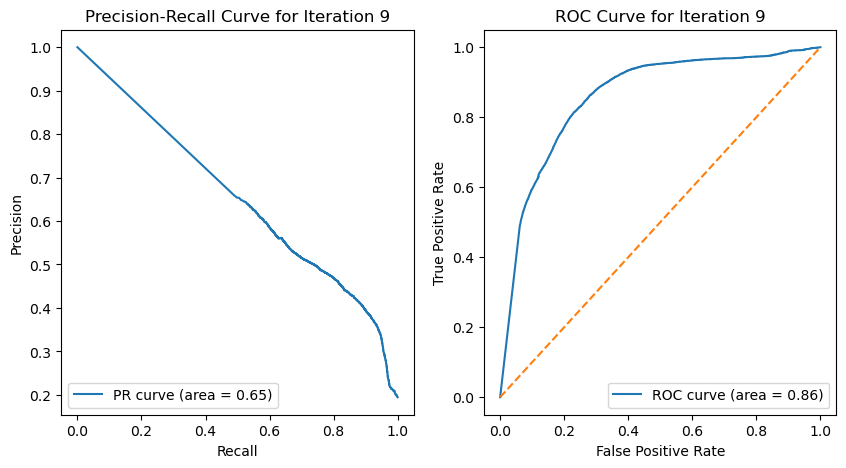

Confusion Matrix:
 [[29103 14866]
 [ 1039  9581]]
--- Iteration 10 ---
Parameters: var_smoothing=1e-06
              precision    recall  f1-score   support

           0       0.98      0.21      0.35     43969
           1       0.23      0.98      0.38     10620

    accuracy                           0.36     54589
   macro avg       0.61      0.60      0.36     54589
weighted avg       0.84      0.36      0.35     54589



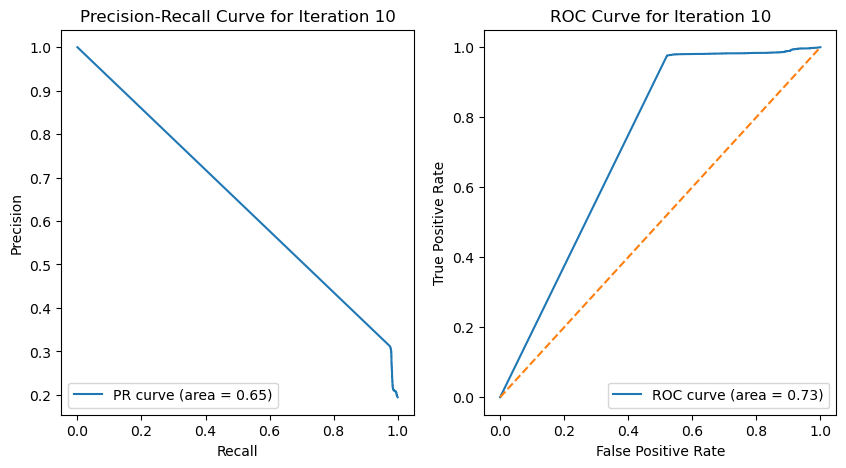

Confusion Matrix:
 [[ 9363 34606]
 [  175 10445]]
--- Iteration 11 ---
Parameters: var_smoothing=0.1
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     43969
           1       0.39      0.90      0.55     10620

    accuracy                           0.71     54589
   macro avg       0.68      0.78      0.67     54589
weighted avg       0.85      0.71      0.74     54589



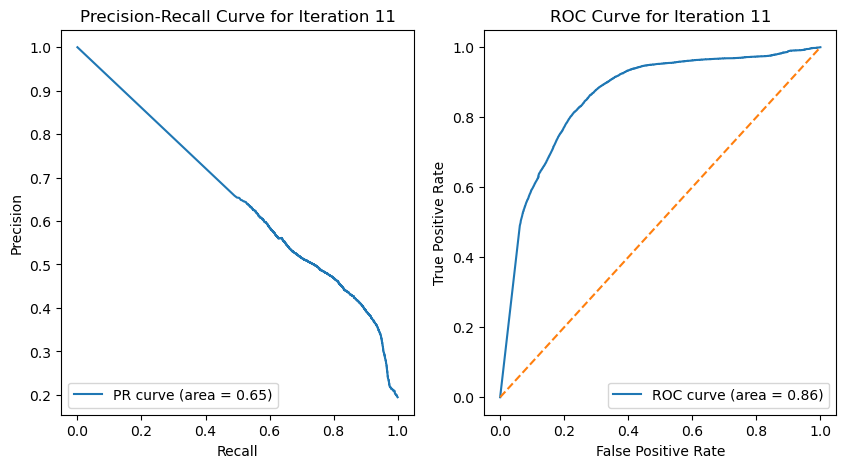

Confusion Matrix:
 [[29103 14866]
 [ 1039  9581]]
--- Iteration 12 ---
Parameters: var_smoothing=1.0
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     43969
           1       0.55      0.64      0.59     10620

    accuracy                           0.83     54589
   macro avg       0.73      0.76      0.74     54589
weighted avg       0.84      0.83      0.83     54589



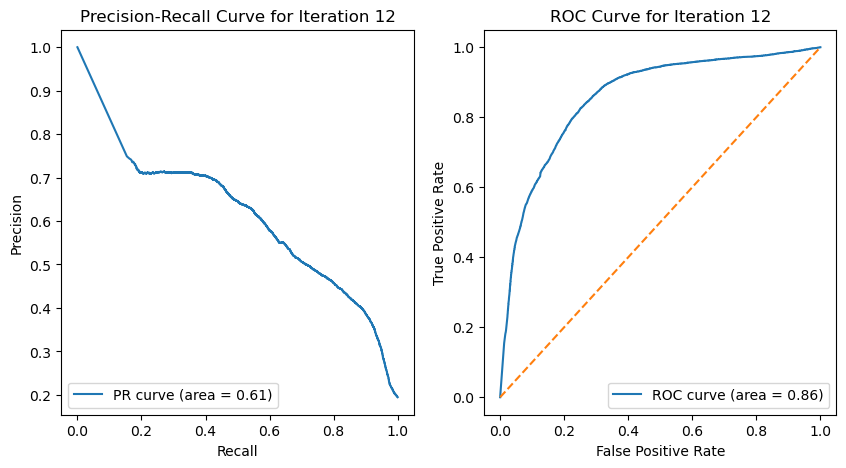

Confusion Matrix:
 [[38448  5521]
 [ 3858  6762]]
--- Iteration 13 ---
Parameters: var_smoothing=0.01
              precision    recall  f1-score   support

           0       0.98      0.56      0.71     43969
           1       0.34      0.95      0.51     10620

    accuracy                           0.64     54589
   macro avg       0.66      0.76      0.61     54589
weighted avg       0.86      0.64      0.67     54589



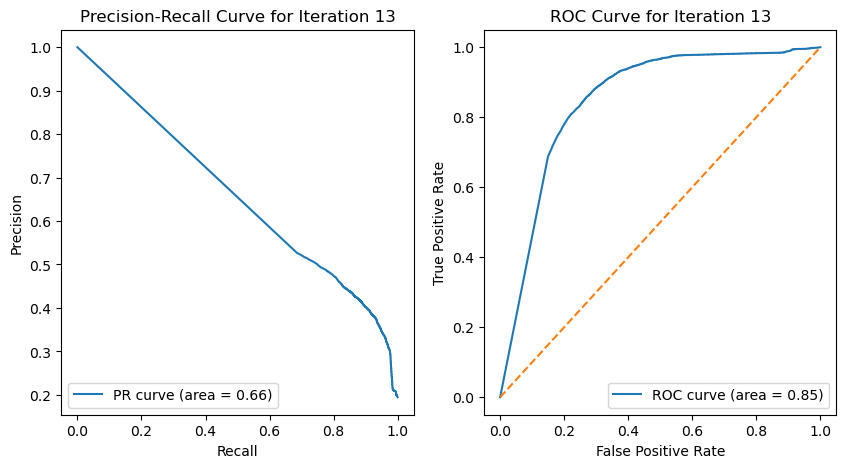

Confusion Matrix:
 [[24674 19295]
 [  512 10108]]
--- Iteration 14 ---
Parameters: alpha=0.2
              precision    recall  f1-score   support

           0       0.92      0.84      0.87     43969
           1       0.50      0.69      0.58     10620

    accuracy                           0.81     54589
   macro avg       0.71      0.76      0.73     54589
weighted avg       0.84      0.81      0.82     54589



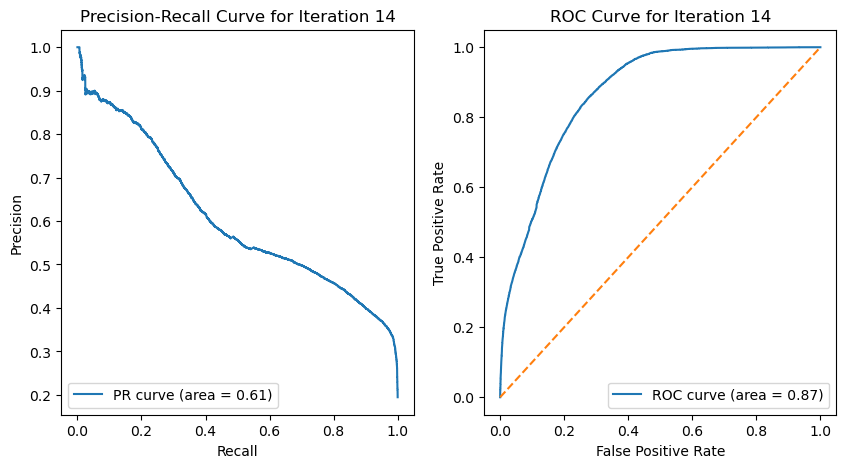

Confusion Matrix:
 [[36730  7239]
 [ 3332  7288]]
--- Iteration 15 ---
Parameters: alpha=0.5
              precision    recall  f1-score   support

           0       0.92      0.84      0.87     43969
           1       0.50      0.69      0.58     10620

    accuracy                           0.81     54589
   macro avg       0.71      0.76      0.73     54589
weighted avg       0.84      0.81      0.82     54589



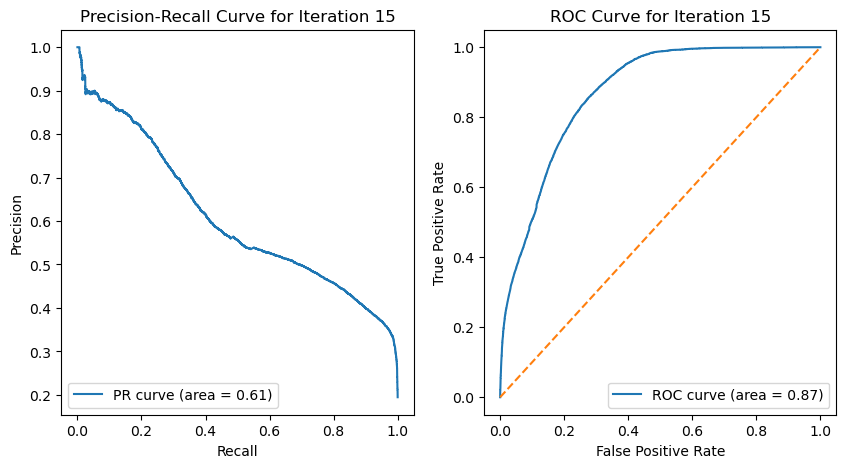

Confusion Matrix:
 [[36730  7239]
 [ 3331  7289]]
--- Iteration 16 ---
Parameters: var_smoothing=1e-07
              precision    recall  f1-score   support

           0       0.97      0.13      0.22     43969
           1       0.21      0.99      0.35     10620

    accuracy                           0.29     54589
   macro avg       0.59      0.56      0.29     54589
weighted avg       0.83      0.29      0.25     54589



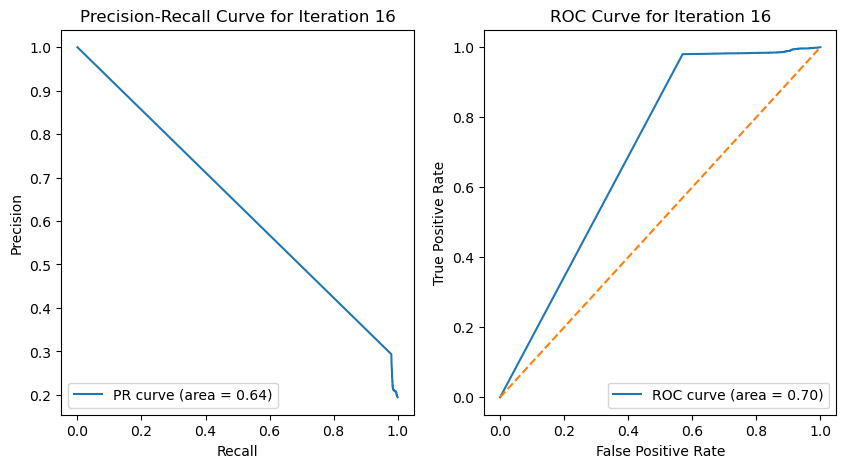

Confusion Matrix:
 [[ 5572 38397]
 [  154 10466]]
--- Iteration 17 ---
Parameters: var_smoothing=1.0
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     43969
           1       0.55      0.64      0.59     10620

    accuracy                           0.83     54589
   macro avg       0.73      0.76      0.74     54589
weighted avg       0.84      0.83      0.83     54589



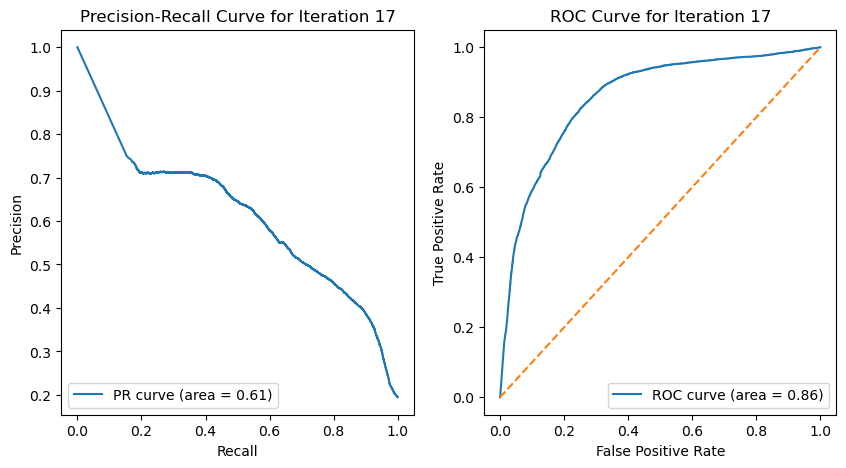

Confusion Matrix:
 [[38448  5521]
 [ 3858  6762]]
--- Iteration 18 ---
Parameters: var_smoothing=1e-08
              precision    recall  f1-score   support

           0       0.97      0.11      0.20     43969
           1       0.21      0.99      0.35     10620

    accuracy                           0.28     54589
   macro avg       0.59      0.55      0.27     54589
weighted avg       0.83      0.28      0.23     54589



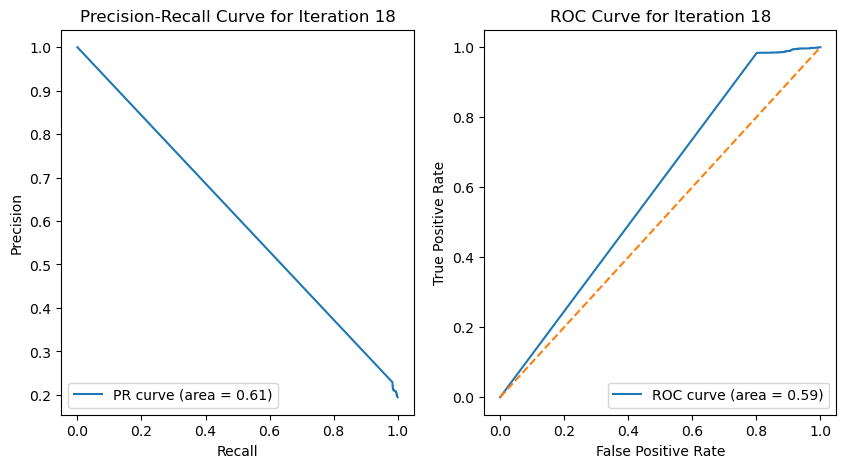

Confusion Matrix:
 [[ 4814 39155]
 [  128 10492]]
--- Iteration 19 ---
Parameters: alpha=0.4
              precision    recall  f1-score   support

           0       0.92      0.84      0.87     43969
           1       0.50      0.69      0.58     10620

    accuracy                           0.81     54589
   macro avg       0.71      0.76      0.73     54589
weighted avg       0.84      0.81      0.82     54589



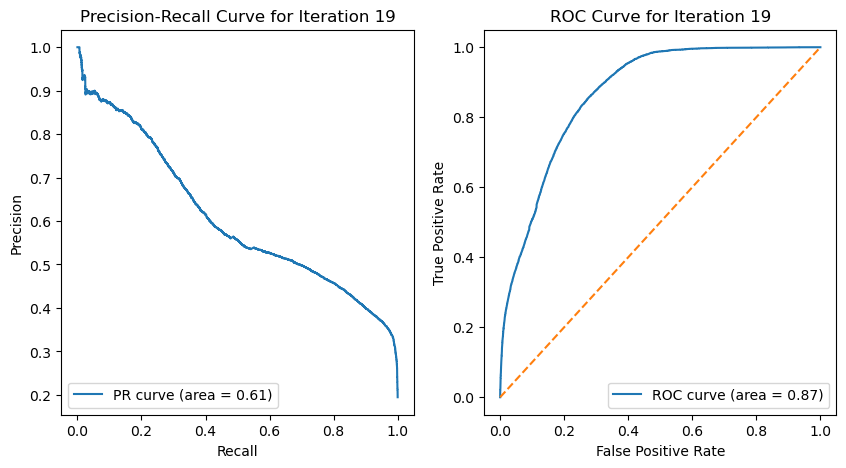

Confusion Matrix:
 [[36730  7239]
 [ 3332  7288]]
--- Iteration 20 ---
Parameters: alpha=0.8
              precision    recall  f1-score   support

           0       0.92      0.84      0.87     43969
           1       0.50      0.69      0.58     10620

    accuracy                           0.81     54589
   macro avg       0.71      0.76      0.73     54589
weighted avg       0.84      0.81      0.82     54589



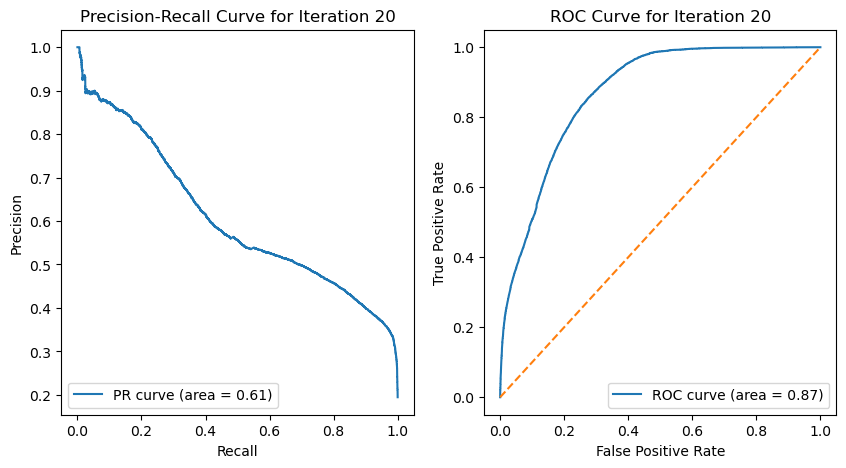

Confusion Matrix:
 [[36731  7238]
 [ 3331  7289]]


In [68]:
import numpy as np
import itertools
import random
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Hyperparameters to explore for Naive Bayes
var_smoothing_options = np.logspace(0, -9, num=10)  # Variance smoothing parameters for GaussianNB
alpha_options = np.linspace(0.1, 1.0, 10)  # Additive (Laplace/Lidstone) smoothing parameter for MultinomialNB and BernoulliNB

# Create combinations for GaussianNB, MultinomialNB, and BernoulliNB
gaussian_combinations = [(var_smoothing,) for var_smoothing in var_smoothing_options]
multinomial_combinations = [(alpha,) for alpha in alpha_options]
bernoulli_combinations = [(alpha,) for alpha in alpha_options]

# Combine all combinations
all_combinations = list(itertools.chain(gaussian_combinations, multinomial_combinations, bernoulli_combinations))

# Select a number of combinations randomly
selected_combinations = random.sample(all_combinations, 20)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# Iterate over the selected combinations
for i, params in enumerate(selected_combinations, 1):
    print(f"--- Iteration {i} ---")

    # Initialize and configure the Naive Bayes model
    if len(params) == 1 and params[0] in var_smoothing_options:
        print(f"Parameters: var_smoothing={params[0]}")
        nb_model = GaussianNB(var_smoothing=params[0])
    elif len(params) == 1 and params[0] in alpha_options:
        print(f"Parameters: alpha={params[0]}")
        # Select MultinomialNB or BernoulliNB based on data properties
        if np.min(X_train_scaled) >= 0:
            nb_model = MultinomialNB(alpha=params[0])
        else:
            nb_model = BernoulliNB(alpha=params[0])

    # Train the model
    nb_model.fit(X_train_scaled, y_train)

    # Predict probabilities for the test set
    if hasattr(nb_model, "predict_proba"):
        y_probs = nb_model.predict_proba(X_test_scaled)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_probs)
        pr_auc = auc(recall, precision)
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
    else:
        pr_auc, roc_auc = None, None

    # Make predictions
    y_pred_nb = nb_model.predict(X_test_scaled)

    # Generate and store the classification report and AUC scores
    report = classification_report(y_test, y_pred_nb)
    results[f"Iteration {i}"] = {"Report": report, "PR AUC": pr_auc, "ROC AUC": roc_auc}
    print(report)

    if pr_auc and roc_auc:
        # Plot the Precision-Recall curve
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve for Iteration {i}')
        plt.legend(loc="lower left")

        # Plot the ROC curve
        plt.subplot(1, 2, 2)
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for Iteration {i}')
        plt.legend(loc="lower right")
        plt.show()

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred_nb)
    print("Confusion Matrix:\n", cm)

# 'results' now contains the classification report, PR AUC, and ROC AUC for each iteration


In [ ]:
#LightGBM

In [58]:
import numpy as np
import itertools
import random
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Hyperparameters to explore for LightGBM
n_estimators_options = range(50, 300, 50)  # Number of boosting rounds
learning_rate_options = np.linspace(0.01, 0.2, 5)  # Learning rates
max_depth_options = range(3, 10)  # Maximum tree depth
num_leaves_options = [31, 50, 70, 100]  # Number of leaves in full tree

# Create combinations
all_combinations = list(itertools.product(n_estimators_options, learning_rate_options, max_depth_options, num_leaves_options))

# Select a number of combinations randomly
selected_combinations = random.sample(all_combinations, 20)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# Iterate over the selected combinations
for i, (n_estimators, learning_rate, max_depth, num_leaves) in enumerate(selected_combinations, 1):
    print(f"--- Iteration {i} ---")
    print(f"Parameters: n_estimators={n_estimators}, learning_rate={learning_rate}, max_depth={max_depth}, num_leaves={num_leaves}")

    # Initialize and configure the LightGBM model
    lgbm_model = lgb.LGBMClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, num_leaves=num_leaves, random_state=42)
    
    # Train the model
    lgbm_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_lgbm = lgbm_model.predict(X_test_scaled)

    # Generate and store the classification report
    report = classification_report(y_test, y_pred_lgbm)
    results[f"Iteration {i}"] = report
    print(report)

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred_lgbm)
    print("Confusion Matrix:\n", cm)

# 'results' now contains the classification report for each iteration


--- Iteration 1 ---
Parameters: n_estimators=250, learning_rate=0.0575, max_depth=9, num_leaves=70
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.76      0.64      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.79      0.81     54589
weighted avg       0.89      0.89      0.89     54589

Confusion Mat

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.76      0.62      0.68     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.78      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Confusion Matrix:
 [[41887  2082]
 [ 4084  6536]]
--- Iteration 4 ---
Parameters: n_estimators=100, learning_rate=0.105, max_depth=9, num_leaves=50
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

--- Iteration 1 ---
Parameters: n_estimators=300, learning_rate=0.08333333333333334, max_depth=8, num_leaves=100
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.76      0.64      0.70     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.80      0.81     54589
weighted avg       0.89      0.89      0.89     54589

Precision-Recall AUC: 0.7821955404273293
ROC AUC: 0.9334925599653137


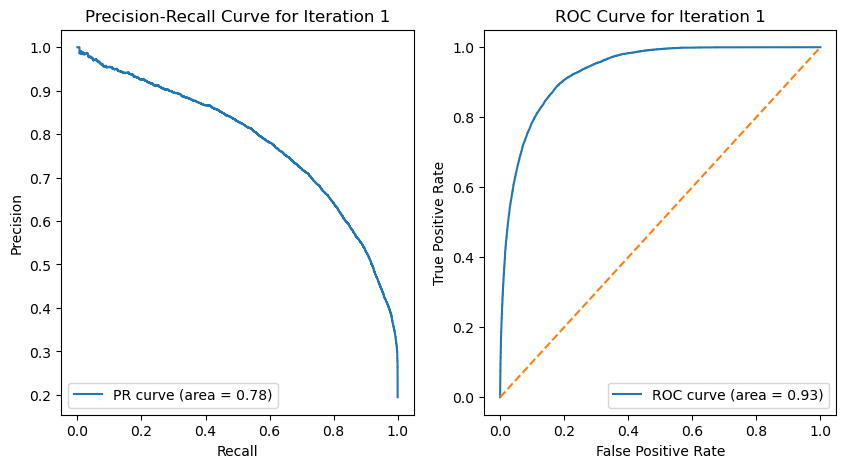

Confusion Matrix:
 [[41756  2213]
 [ 3781  6839]]
--- Iteration 2 ---
Parameters: n_estimators=250, learning_rate=0.05, max_depth=6, num_leaves=100
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43969
           1       0.76      0.62      0.68     10620

    accuracy                           0.89     54589
   macro avg       0.83      0.79      0.81     54589
weighted avg       0.88      0.89      0.88     54589

Precision-Recall AUC: 0.7757898518491972
ROC AUC: 0.9311297927374701


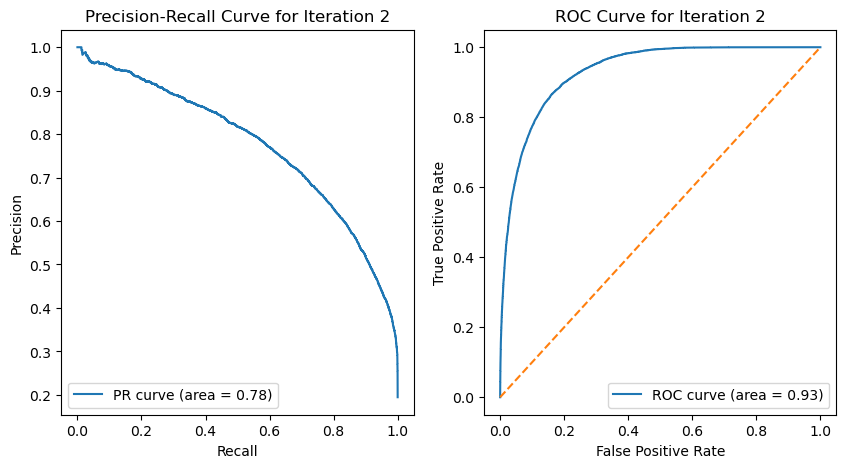

Confusion Matrix:
 [[41848  2121]
 [ 4020  6600]]
--- Iteration 3 ---
Parameters: n_estimators=250, learning_rate=0.15, max_depth=9, num_leaves=70
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.75      0.64      0.69     10620

    accuracy                           0.89     54589

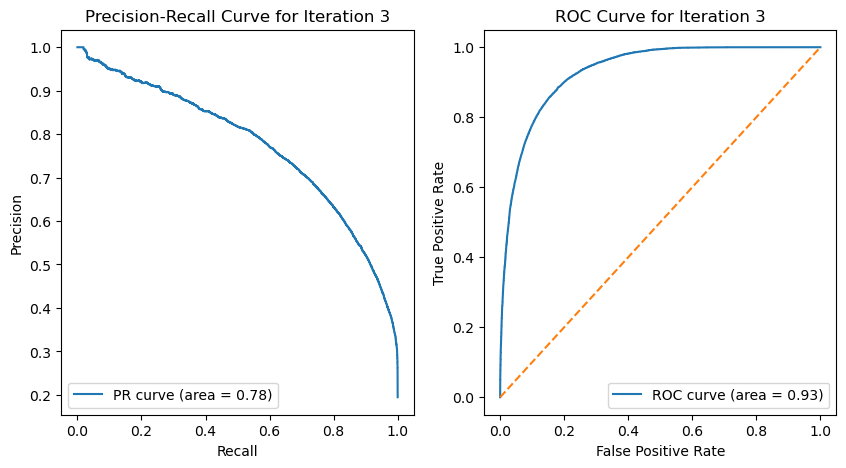

Confusion Matrix:
 [[41705  2264]
 [ 3847  6773]]
--- Iteration 4 ---
Parameters: n_estimators=300, learning_rate=0.05, max_depth=8, num_leaves=100
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     43969
           1       0.76      0.64      0.69     10620

    accuracy                           0.89     54589
   macro avg       0.84      0.79      0.81     54589
weighted avg       0.89      0.89      0.89     54589

Precision-Recall AUC: 0.7825335671206728
ROC AUC: 0.933407338991917


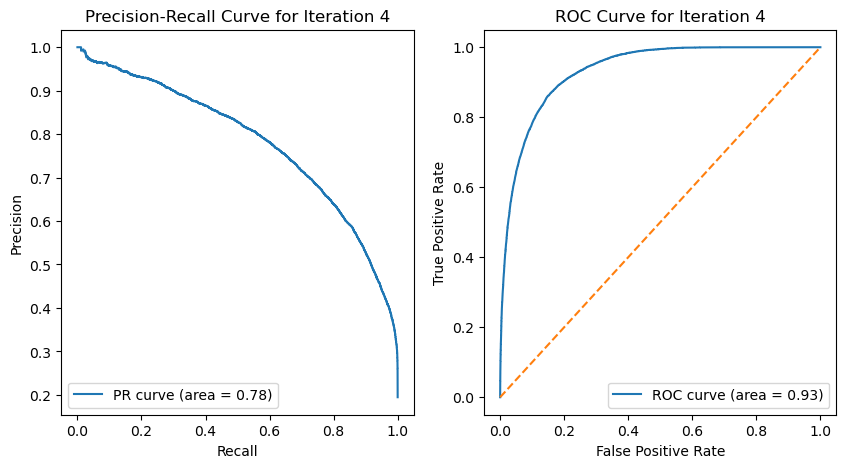

Confusion Matrix:
 [[41797  2172]
 [ 3840  6780]]
--- Iteration 5 ---
Parameters: n_estimators=300, learning_rate=0.11666666666666667, max_depth=6, num_leaves=100
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

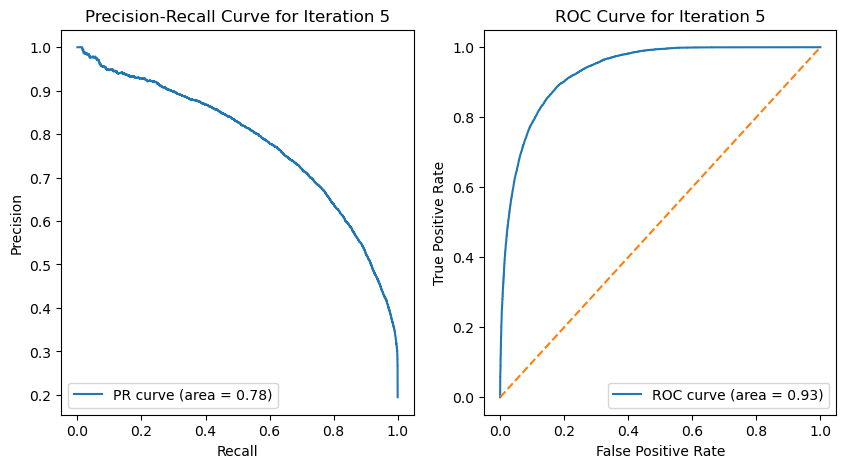

Confusion Matrix:
 [[41797  2172]
 [ 3829  6791]]
--- Iteration 6 ---
Parameters: n_estimators=150, learning_rate=0.08333333333333334, max_depth=9, num_leaves=70
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   suppor

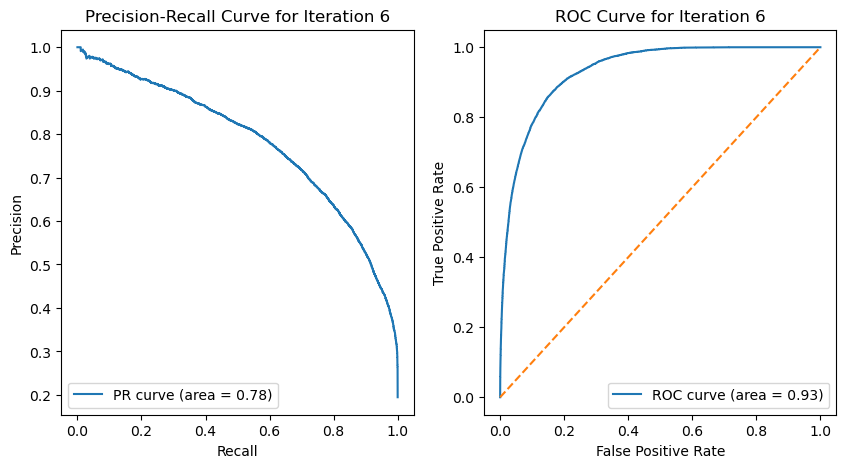

Confusion Matrix:
 [[41819  2150]
 [ 3856  6764]]
--- Iteration 7 ---
Parameters: n_estimators=200, learning_rate=0.11666666666666667, max_depth=9, num_leaves=100
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

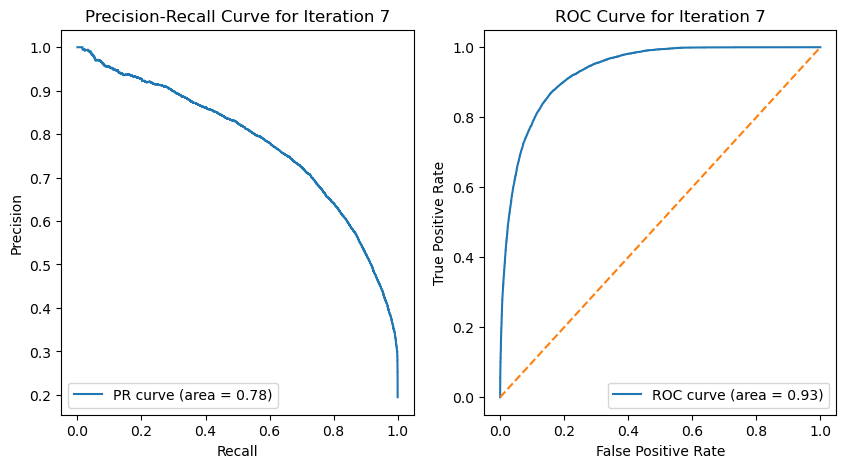

Confusion Matrix:
 [[41743  2226]
 [ 3771  6849]]
--- Iteration 8 ---
Parameters: n_estimators=250, learning_rate=0.05, max_depth=9, num_leaves=70
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

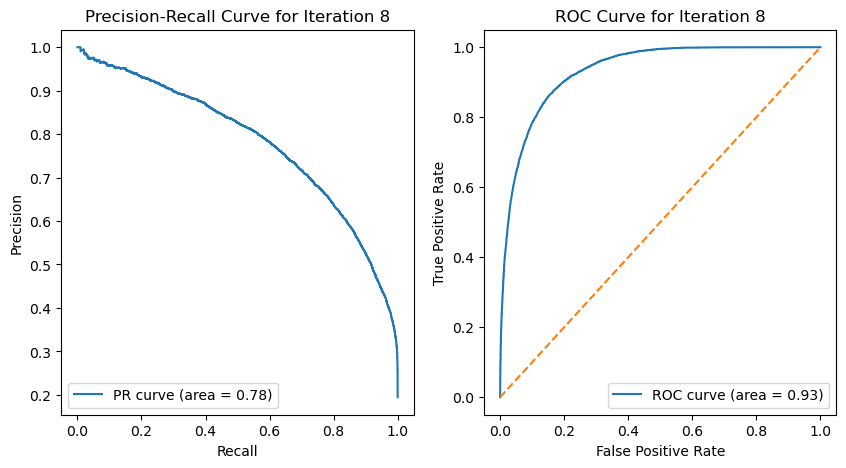

Confusion Matrix:
 [[41828  2141]
 [ 3860  6760]]
--- Iteration 9 ---
Parameters: n_estimators=150, learning_rate=0.15, max_depth=6, num_leaves=70
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

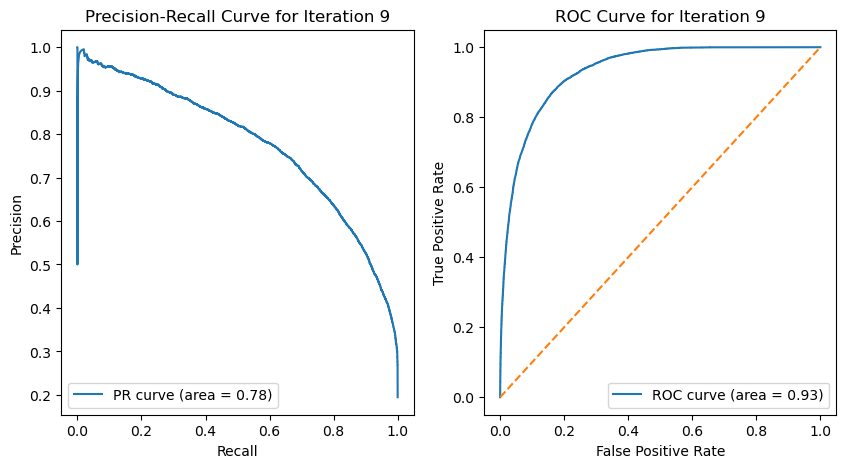

Confusion Matrix:
 [[41858  2111]
 [ 3893  6727]]
--- Iteration 10 ---
Parameters: n_estimators=250, learning_rate=0.11666666666666667, max_depth=6, num_leaves=100
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

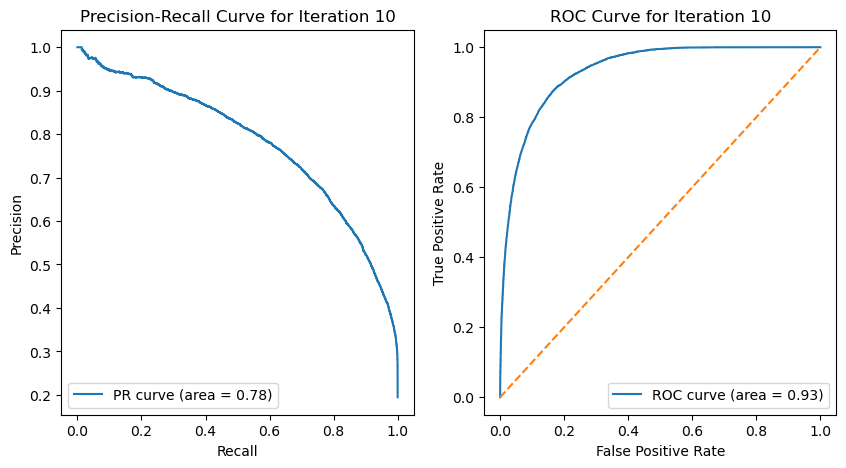

Confusion Matrix:
 [[41819  2150]
 [ 3831  6789]]


In [59]:
import numpy as np
import itertools
import random
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Adjusted hyperparameters based on best results
n_estimators_options = np.linspace(150, 300, 4, dtype=int)  # Focusing around 250 and 150
learning_rate_options = np.linspace(0.05, 0.15, 4)          # Narrowing around 0.0575 and 0.105
max_depth_options = [6, 8, 9]                               # Focusing around depth 6, 8, and 9
num_leaves_options = [70, 100]                              # Focusing around 70 and 100

# Create combinations
all_combinations = list(itertools.product(n_estimators_options, learning_rate_options, max_depth_options, num_leaves_options))

# Select a number of combinations randomly
selected_combinations = random.sample(all_combinations, 20)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# Iterate over the selected combinations
for i, (n_estimators, learning_rate, max_depth, num_leaves) in enumerate(selected_combinations, 1):
    print(f"--- Iteration {i} ---")
    print(f"Parameters: n_estimators={n_estimators}, learning_rate={learning_rate}, max_depth={max_depth}, num_leaves={num_leaves}")

    # Initialize and configure the LightGBM model
    lgbm_model = lgb.LGBMClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, num_leaves=num_leaves, random_state=42)
    
    # Train the model
    lgbm_model.fit(X_train_scaled, y_train)

    # Predict probabilities for the test set
    y_probs = lgbm_model.predict_proba(X_test_scaled)[:, 1]

    # Calculate precision, recall, and PR AUC
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    pr_auc = auc(recall, precision)

    # Calculate FPR, TPR, and ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # Generate and store the classification report, PR AUC, and ROC AUC
    y_pred_lgbm = lgbm_model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred_lgbm)
    results[f"Iteration {i}"] = {"Report": report, "PR AUC": pr_auc, "ROC AUC": roc_auc}
    print(report)
    print(f"Precision-Recall AUC: {pr_auc}")
    print(f"ROC AUC: {roc_auc}")

    # Plot the Precision-Recall curve
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for Iteration {i}')
    plt.legend(loc="lower left")

    # Plot the ROC curve
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Iteration {i}')
    plt.legend(loc="lower right")
    plt.show()

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred_lgbm)
    print("Confusion Matrix:\n", cm)

# 'results' now contains the classification report, PR AUC, and ROC AUC for each iteration


In [60]:
import numpy as np
import itertools
import random
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc, recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Adjusted hyperparameters based on best results
n_estimators_options = np.linspace(150, 300, 4, dtype=int)  # Focusing around 250 and 150
learning_rate_options = np.linspace(0.05, 0.15, 4)          # Narrowing around 0.0575 and 0.105
max_depth_options = [6, 8, 9]                               # Focusing around depth 6, 8, and 9
num_leaves_options = [70, 100]                              # Focusing around 70 and 100

# Create combinations
all_combinations = list(itertools.product(n_estimators_options, learning_rate_options, max_depth_options, num_leaves_options))

# Select a number of combinations randomly
selected_combinations = random.sample(all_combinations, 20)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# Variable to track the best recall for class 1
best_recall_for_class_1 = 0
best_model_info = None

# Iterate over the selected combinations
for i, (n_estimators, learning_rate, max_depth, num_leaves) in enumerate(selected_combinations, 1):
    print(f"--- Iteration {i} ---")
    print(f"Parameters: n_estimators={n_estimators}, learning_rate={learning_rate}, max_depth={max_depth}, num_leaves={num_leaves}")

    # Initialize and configure the LightGBM model
    lgbm_model = lgb.LGBMClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, num_leaves=num_leaves, random_state=42)
    
    # Train the model
    lgbm_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_lgbm = lgbm_model.predict(X_test_scaled)

    # Calculate recall for class 1
    recall_for_class_1 = recall_score(y_test, y_pred_lgbm, pos_label=1)

    # Update best model info if current model has higher recall for class 1
    if recall_for_class_1 > best_recall_for_class_1:
        best_recall_for_class_1 = recall_for_class_1
        best_model_info = {
            "Iteration": i,
            "Parameters": {
                "n_estimators": n_estimators, 
                "learning_rate": learning_rate, 
                "max_depth": max_depth, 
                "num_leaves": num_leaves
            },
            "Recall for Class 1": recall_for_class_1
        }

    # Store the results
    results[f"Iteration {i}"] = {
        "Parameters": {
            "n_estimators": n_estimators, 
            "learning_rate": learning_rate, 
            "max_depth": max_depth, 
            "num_leaves": num_leaves
        },
        "Recall for Class 1": recall_for_class_1
    }

# Print the best model information
print("Best Model based on Recall for Class 1:")
print(best_model_info)

# Optional: Continue with plotting Precision-Recall and ROC curves for the best model
# (You will need to retrain the best model and generate predictions/probabilities)


--- Iteration 1 ---
Parameters: n_estimators=200, learning_rate=0.15, max_depth=6, num_leaves=100
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

--- Iteration 3 ---
Parameters: n_estimators=300, learning_rate=0.08333333333333334, max_depth=8, num_leaves=70
[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 25027, number of negative: 102347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 127374, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196484 -> initscore=-1.408414
[LightGBM] [Info] Start training from score -1.408414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

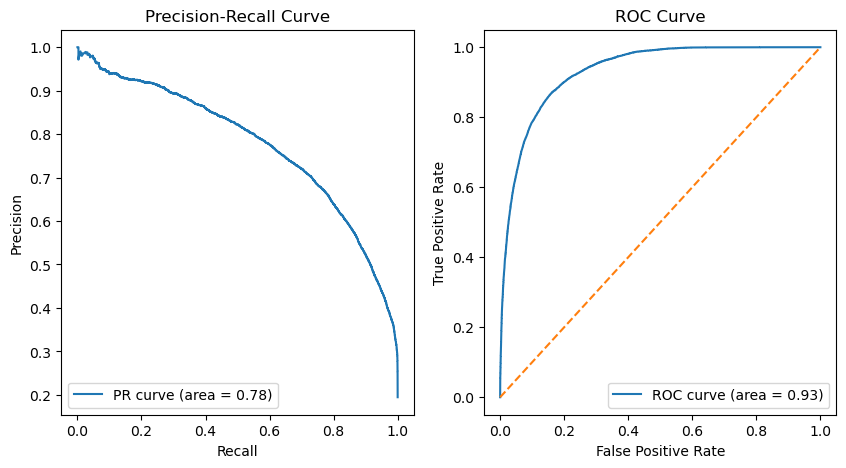

In [61]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Adjusted parameters based on best results
n_estimators = 250
learning_rate = 0.15
max_depth = 9
num_leaves = 100

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and configure the LightGBM model
lgbm_model = lgb.LGBMClassifier(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    max_depth=max_depth,
    num_leaves=num_leaves,
    random_state=42
)

# Train the model
lgbm_model.fit(X_train_scaled, y_train)

# Predict probabilities for the test set
y_probs = lgbm_model.predict_proba(X_test_scaled)[:, 1]

# Calculate precision, recall, and PR AUC
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

# Calculate FPR, TPR, and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Make predictions
y_pred_lgbm = lgbm_model.predict(X_test_scaled)

# Generate and print the classification report
report = classification_report(y_test, y_pred_lgbm)
print("Classification Report:\n", report)

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred_lgbm)
print("Confusion Matrix:\n", cm)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Plot the ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
